<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>مقدمه</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    در این فاز از پروژه، تمرکز ما بر 
    crawling 
    و تحلیل مقالات استخراج‌شده از اینترنت خواهد بود. ما با بررسی تکنیک های مختلف  
    web crawling
    برای استخراج مقالات و سایر اطلاعات مرتبط از وب شروع خواهیم کرد.
    <br>
    در مرحله بعد، الگوریتم های تجزیه و تحلیل  لینک مانند
    PageRank
    و 
    HITS
    را برای تعیین اهمیت این مقالات بر اساس نقل قول‌ها، ارجاعات یا اشکال دیگر پیوندها اعمال خواهیم‌کرد. ما همچنین یاد خواهیم‌گرفت که چگونه یک الگوریتم 
    PageRank
    شخصی‌سازی‌شده را پیاده‌سازی کنیم که ترجیحات کاربر را برای ارائه نتایج مرتبط تر در نظر می‌گیرد.
    <br>
    در بخش سوم این مرحله، یک موتور جستجوی شخصی‌سازی شده را پیاده‌سازی میکنیم و یاد می‌گیریم که چگونه موتور جستجویی بسازیم که نتایجی را بر اساس ترجیحات کاربر ارائه دهد.
    <br>
در نهایت، ما یک 
    task 
     در مورد 
    recommendation system 
    ها خواهیم‌داشت، که در آن از تکنیک های مختلف برای توصیه مقالات یا صفحات وب به کاربران بر اساس ترجیحات و رفتار آنها استفاده خواهیم کرد.
    <br>
     تنها زبان قابل قبول برای پروژه پایتون است. محدودیت استفاده از کتاب‌خانه‌های آماده در هر بخش مشخص شده است. در انتهای پروژه قرار است یک سیستم یکپارچه‌ی جست‌و‌جو داشته باشید، بنابراین به پیاده‌سازی هر چه بهتر این فاز توجه داشته باشید.
</font>
</div>
   

<div dir="rtl">
<font face="XB Zar" size=4>
    <h1>
    <b>پیاده‌سازی Crawler (۴۰ نمره)</b>
    </h1>
</font>
    <br>

<font face="XB Zar" size=3>
   در این بخش باید یک Crawler 
    برای واکشی اطلاعات تعدادی مقاله از سایت <a href="https://www.semanticscholar.org/">Semantic Scholar</a> پیاده سازی کنید.
   اطلاعات واکشی شده باید حاوی موارد زیر باشد.
</font>
</div>
<br>
<table dir="ltr" style="width: 100%; border-collapse: collapse;">
  <tr>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">ID</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Title</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Abstract</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Publication Year</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Authors</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Related Topics</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Citation Count</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Reference Count</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">References</th>
  </tr>
  <tr>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Unique ID of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Title of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Abstract of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Publication year</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Name of the first author, ..., Name of the last author</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">topic1, topic2, ...</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">number of citations of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">number of references of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">ID of the first reference, ..., ID of the tenth reference</td>
  </tr>
</table>
    <br>

In [18]:
!pip install gdown

In [4]:
import time
import pprint
import json
from collections import defaultdict
from scipy import linalg
import numpy as np
import pandas as pd

In [5]:
writers = ['Rabiee', 'Rohban', 'Sharifi', 'Soleymani', 'Kasaei']

In [21]:
import gdown

In [22]:
url = 'https://drive.google.com/drive/folders/1arkiPq89oR9iaQEHaECKKUmqAmwa5IaN?usp=sharing'
gdown.download_folder(url, quiet=True)

['/kaggle/working/HW3/ir-phase-3.ipynb',
 '/kaggle/working/HW3/Kasaei.txt',
 '/kaggle/working/HW3/Rabiee.txt',
 '/kaggle/working/HW3/recommended_papers.json',
 '/kaggle/working/HW3/recommended_papers.rar',
 '/kaggle/working/HW3/Rohban.txt',
 '/kaggle/working/HW3/Sharifi.txt',
 '/kaggle/working/HW3/Soleymani.txt']

<div dir="rtl">

<font face="XB Zar" size=3>
  ابتدا فرایند واکشی را از ۵ مقاله‌ی هر استاد شروع کنید و
    ۱۰
    مرجع اول هر مقاله را به صف مقالات اضافه کنید.
    فرایند واکشی را نا جایی ادامه دهید که اطلاعات ۲۰۰۰ مقاله را داشته باشید.
    اطلاعات مقالات را در فایل crawled_paper_profName.json ذخیره کنید.
</font>
</div>

<div dir="rtl">

<font face="XB Zar" size=3>
  در پیاده سازی Crawler به موارد زیر دقت کنید.
    
    
<ul>
<li>حق استفاده از api سایت semantic scholar را ندارید.</li>
<li>برای واکشی می‌توانید از پکیج‌هایی مثل <a href="https://www.selenium.dev/selenium/docs/api/py/">Selenium</a> و یا <a href="https://github.com/scrapy/scrapy">Scrapy</a>  استفاده کنید. استفاده از پکیج‌های دیگر نیز مجاز است. همچنین برای پارس اطلاعات واکشی شده می‌توانید از پکیج <a href="https://pypi.org/project/beautifulsoup4/">Beautiful Soup</a> استفاده کنید.
</li>
<li>بین هر بار درخواست از سایت یک فاصله چند ثانیه‌ای بدهید.</li>
<li>در زمان تحویل کد Crawler شما اجرا خواهد شد و صحت آن بررسی خواهد شد.</li>
<li>در صورتی که ‌Crawler شما به دچار اروری مثل request timeout شد نباید کار خود را متوقف کند.</li>
</ul>


</font>
</div>

In [3]:
!wget https: // dl.google.com/linux/linux_signing_key.pub
!sudo apt-key add linux_signing_key.pub
!echo 'deb [arch=amd64] http://dl.google.com/linux/chrome/deb/ stable main' >> /etc/apt/sources.list.d/google-chrome.list
!sudo apt-get -y update
!sudo apt-get install -y google-chrome-stable

--2023-06-25 07:38:44--  https://dl.google.com/linux/linux_signing_key.pub
Resolving dl.google.com (dl.google.com)... 64.233.187.136, 64.233.187.190, 64.233.187.93, ...
Connecting to dl.google.com (dl.google.com)|64.233.187.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14605 (14K) [application/octet-stream]
Saving to: ‘linux_signing_key.pub.15’

linux_signing_key.p 100%[===================>]  14.26K  --.-KB/s    in 0s      

2023-06-25 07:38:44 (71.1 MB/s) - ‘linux_signing_key.pub.15’ saved [14605/14605]

OK
Get:1 http://dl.google.com/linux/chrome/deb stable InRelease [1825 B]
Get:2 http://packages.cloud.google.com/apt gcsfuse-focal InRelease [5002 B]    
Get:3 https://packages.cloud.google.com/apt cloud-sdk InRelease [6361 B]       
Get:4 http://dl.google.com/linux/chrome/deb stable/main amd64 Packages [1080 B]
Get:5 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [467 kB]
Get:6 http://security.ubuntu.com/ubuntu focal-security InRele

In [4]:
# install chromedriver
# !apt-get install -y qq unzip
!wget -O/tmp/chromedriver.zip http: // chromedriver.storage.googleapis.com/ `curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE` /chromedriver_linux64.zip
!unzip/tmp/chromedriver.zip chromedriver -d/usr/local/bin/

curl: /opt/conda/lib/libcurl.so.4: no version information available (required by curl)
--2023-06-25 07:39:15--  http://chromedriver.storage.googleapis.com/114.0.5735.90/chromedriver_linux64.zip
Resolving chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c04::80
Connecting to chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)|74.125.204.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7407250 (7.1M) [application/zip]
Saving to: ‘/tmp/chromedriver.zip’

/tmp/chromedriver.z 100%[===================>]   7.06M  6.84MB/s    in 1.0s    

2023-06-25 07:39:16 (6.84 MB/s) - ‘/tmp/chromedriver.zip’ saved [7407250/7407250]

Archive:  /tmp/chromedriver.zip
  inflating: /usr/local/bin/chromedriver  


In [5]:
# install selenium
!sudo apt install -y python3-selenium
!pip install selenium == 3.141.0 > /dev/null

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  apparmor chromium-browser chromium-chromedriver liblzo2-2 snapd
  squashfs-tools
Suggested packages:
  apparmor-profiles-extra apparmor-utils zenity | kdialog
The following NEW packages will be installed:
  apparmor chromium-browser chromium-chromedriver liblzo2-2 python3-selenium
  snapd squashfs-tools
0 upgraded, 7 newly installed, 0 to remove and 71 not upgraded.
Need to get 38.7 MB of archives.
After this operation, 174 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 apparmor amd64 2.13.3-7ubuntu5.2 [502 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 liblzo2-2 amd64 2.10-2 [50.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 squashfs-tools amd64 1:4.4-1ubuntu0.3 [117 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 snapd amd

In [6]:
!google-chrome --version

Google Chrome 114.0.5735.133 


In [7]:
!chromedriver -v

ChromeDriver 114.0.5735.90 (386bc09e8f4f2e025eddae123f36f6263096ae49-refs/branch-heads/5735@{#1052})


In [107]:
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from selenium.webdriver.common.by import By
from PIL import Image
from selenium.webdriver.common.action_chains import ActionChains

In [108]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("--window-size=1920,1080")
driver = webdriver.Chrome(options=chrome_options)

In [109]:
paper_urls = defaultdict(list)

for writer in writers:
    with open(f'/kaggle/working/HW3/{writer}.txt', "r") as f:
        for url in f:
            paper_urls[writer].append((url, None))

In [110]:
paper_urls[writers[0]][2]

('https://www.semanticscholar.org/paper/A-Hybrid-Deep-Learning-Architecture-for-Mobile-Osia-Shamsabadi/6f0685d61328f0f90972fe822258d574b74e9c7a\n',
 None)

In [111]:
def parese_one_paper(url):
    driver.get(url)
    title = driver.find_element(By.CSS_SELECTOR, "h1[data-test-id='paper-detail-title']").text
    id_element = driver.find_elements(By.CSS_SELECTOR, "li[data-test-id='corpus-id']")
    if id_element:
        paper_id = id_element[0].text[len('Corpus ID: '):]
    else:
        paper_id = ''
    expand_button = driver.find_elements(By.CSS_SELECTOR, "button[data-test-id='text-truncator-toggle']")
    if expand_button:
        expand_button[0].click()
    abstract_element = driver.find_elements(By.CSS_SELECTOR, ".text-truncator.abstract__text.text--preline")
    if abstract_element:
        abstract = abstract_element[0].text.rstrip(' \nCollapse')
    else:
        abstract = ''
    date = driver.find_element(By.CSS_SELECTOR, "span[data-test-id='paper-year']").text

    expand_authors_button = driver.find_elements(By.CSS_SELECTOR, "button[data-test-id='author-list-expand']")
    if expand_authors_button:
        ActionChains(driver).move_to_element(expand_authors_button[0]).click().perform()
    authors = [x.strip().rstrip(" less") for x in driver.find_element(By.CSS_SELECTOR, ".author-list").text.split(',')]
    citation_element = driver.find_elements(By.CSS_SELECTOR, ".scorecard-stat__headline__dark")
    if citation_element:
        citation_count = citation_element[0].text.rstrip(' Citations')
    else:
        citation_count = ''
    references_count = driver.find_element(By.XPATH, '''//*[@id="cited-papers"]/div[1]/div/div/h2''').text.rstrip(
        ' References')
    references = driver.find_element(By.XPATH, '''//*[@id="cited-papers"]/div[2]/div/div[1]''')
    references_list = references.find_elements(By.CSS_SELECTOR, ".link-button--show-visited")
    reference_urls = []
    for reference in references_list:
        reference_urls.append(reference.get_attribute('href'))

    related = driver.find_element(By.CSS_SELECTOR, ".flex-container.similar-papers__body")
    related_papers = related.find_elements(By.CSS_SELECTOR, '.cl-container')
    print(related_papers, related)
    related_urls = [element.get_attribute("href") for element in related_papers]

    paper_urls[writer] += [(x, paper_id) for x in reference_urls]
    paper_data = {
        'paper_id': paper_id,
        'title': title,
        'abstract': abstract,
        'date': date,
        'authors': authors,
        'citation_count': citation_count,
        'references_count': references_count,
        'reference_ids': [],
        'related_papers': related_urls
    }
    return paper_data

In [112]:
pp = pprint.PrettyPrinter(indent=4)

c = 0
for writer in writers:
    crawled_datas = {}
    print(writer)
    c = 0
    for url, father in paper_urls[writer][:2]:
        if c >= 400:
            break
        try:
            time.sleep(10)
            data = parese_one_paper(url)
            print(data)
            crawled_datas[data['paper_id']] = data
            if father:
                crawled_datas[father]['reference_ids'].append(data['paper_id'])
            if c % 20 == 0:
                print(c)
            c += 1
        except Exception as e:
            print(e, url)
        with open(f"crawled_paper_{writer}.json", "w") as f:
            json.dump(crawled_datas, f)

Rabiee
[] <selenium.webdriver.remote.webelement.WebElement (session="6bdda21d7deca9f4b2883b62872433da", element="5FEE956F5BE9EA2D237D71387F6D5D59_element_68")>
{'paper_id': '9281781', 'title': 'Spatial-Aware Dictionary Learning for Hyperspectral Image Classification', 'abstract': 'This paper presents a structured dictionary-based model for hyperspectral data that incorporates both spectral and contextual characteristics of spectral samples. The idea is to partition the pixels of a hyperspectral image into a number of spatial neighborhoods called contextual groups and to model the pixels inside a group as members of a common subspace. That is, each pixel is represented using a linear combination of a few dictionary elements learned from the data, but since pixels inside a contextual group are often made up of the same materials, their linear combinations are constrained to use common elements from the dictionary. To this end, dictionary learning is carried out with a joint sparse regula

KeyboardInterrupt: 

In [ ]:
crawled_datas

<div dir="rtl">
<font face="XB Zar" size=4>
    <h1>
    <b>PageRank 
        شخصی‌سازی‌شده
        (۲۰ نمره)</b>
    </h1>
</font>
    <br>
<font face="XB Zar" size=3>
در این بخش، الگوریتم 
    PageRank 
    شخصی‌سازی‌شده را پیاده‌سازی می‌کنیم که توسعه‌ای از الگوریتم 
    PageRank
    است که ترجیحات کاربر را در نظر می‌گیرد. الگوریتم 
    PageRank
    شخصی‌سازی‌شده گره‌ها را در یک گراف بر اساس اهمیت آنها برای کاربر رتبه‌بندی می‌کند، نه بر اساس اهمیت کلی آنها در نمودار.
    
</font>
</div>

In [116]:
url = "https://drive.google.com/drive/folders/1Kl_W1zhqfd1kNyKZ_NR5N9YK1gof6TXl"
gdown.download_folder(url, quiet=True)

['/kaggle/working/crawled_data/crawled_paper_Kasaei.json',
 '/kaggle/working/crawled_data/crawled_paper_Rabiee.json',
 '/kaggle/working/crawled_data/crawled_paper_Rohban.json',
 '/kaggle/working/crawled_data/crawled_paper_Sharifi.json',
 '/kaggle/working/crawled_data/crawled_paper_Soleymani.json']

In [117]:
def create_adjacency_matrix(nodes):
    node_ids = set()
    for node in nodes:
        node_ids.add(nodes[node]["paper_id"])
        node_ids.update(nodes[node]["reference_ids"])

    id_to_index = {node_id: index for index, node_id in enumerate(node_ids)}

    matrix_size = len(node_ids)
    adjacency_matrix = [[0] * matrix_size for _ in range(matrix_size)]

    for node in nodes:
        n = len(nodes[node]["reference_ids"])
        source_index = id_to_index[nodes[node]["paper_id"]]
        for destination_id in nodes[node]["reference_ids"]:
            destination_index = id_to_index[destination_id]
            adjacency_matrix[source_index][destination_index] = 1 / n

    return adjacency_matrix, id_to_index


In [118]:
from typing import Dict, List


def pagerank(graph: Dict[str, List[str]]) -> Dict[str, float]:
    """
    Returns the personalized PageRank scores for the nodes in the graph, given the user's preferences.

    Parameters:
    graph (Dict[str, List[str]]): The graph represented as a dictionary of node IDs and their outgoing edges.
    
    Returns:
    Dict[str, float]: A dictionary of node IDs and their personalized PageRank scores.
    """
    adjacency_matrix, id_to_index = create_adjacency_matrix(graph)
    adjacency_matrix = np.array(adjacency_matrix)
    P = 0.9 * adjacency_matrix + 0.1 * (1 / len(graph))
    w, vl = linalg.eig(P)
    largest_eigenvector = vl[:, np.argmax(w)]
    index_to_id = {v: k for k, v in id_to_index.items()}
    result = {index_to_id[i]: v for i, v in enumerate(largest_eigenvector)}
    result = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse=True)}

    return result

<div dir="rtl">
<font face="XB Zar" size=3>
در این بخش از الگوریتم 
PageRank
شخصی‌سازی‌شده که در قسمت قبلی پیاده‌سازی شده‌است برای
شناسایی مقالات مهم مرتبط با حوزه‌ی کاری یک استاد 
خاص استفاده می‌کنیم. این تابع، یک 
    field 
    را به عنوان ورودی دریافت می‌کند. خروجی نیز
مقالات برتری که بیشترین ارتباط را با آن زمینه دارند؛ خواهدبود.
</font>
</div>

In [119]:
from itertools import islice


def important_articles(Professor: str) -> List[str]:
    """
    Returns the most important articles in the field of given professor, based on the personalized PageRank scores.

    Parameters:
    Professor (str): Professor's name.

    Returns:
    List[str]: A list of article IDs representing the most important articles in the field of given professor.
    """
    with open(f'/kaggle/working/crawled_data/crawled_paper_{Professor}.json') as f:
        papers = json.load(f)
        pr = pagerank(papers)
        return [{k, pr[k]} for k in list(pr.keys())[:10]]

In [120]:
important_articles('Soleymani')

[{(0.48942785616762513+0j), '235097481'},
 {(0.39035063714938384+0j), '196551931'},
 {(0.3463515941009826+0j), '232145932'},
 {(0.32094358432282194+0j), '231972684'},
 {(0.16781462092956187+0j), '202539519'},
 {(0.14983619469015136+0j), '174800445'},
 {(0.14983619469015122+0j), '205330797'},
 {(0.1449474121292178+0j), '5458500'},
 {(0.14494741212921777+0j), '3361768'},
 {(0.10094836908081735+0j), '16267073'}]

<div dir="rtl">
<font face="XB Zar" size=4>
    <h1>
    <b>جستجو شخصی‌سازی‌شده (۱۰ نمره)</b>
    </h1>
</font>
    <br>
<font face="XB Zar" size=3>
الگوریتم جست‌و‌جویی که در فازهای گذشته پیاده‌سازی کرده‌اید را به گونه‌ای تغییر دهید که نتایج به دست آمده جست‌و‌جو بر حسب علایق فرد مرتب شوند. از قضیه‌ی خطی بودن برای این کار استفاده کنید.
    
</font>
</div>

In [1]:
from phase1 import *
from ast import literal_eval

[nltk_data] Downloading package punkt to /home/solale/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/solale/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/solale/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/solale/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
def create_writer_df(writer_papers):
    for p in writer_papers:
        writer_papers[p]['title'] = clean_data(writer_papers[p]['title'])
        writer_papers[p]['abstract'] = clean_data(writer_papers[p]['abstract'])

    df = pd.DataFrame([{k: v[k] for k in ['title', 'abstract', 'paper_id']} for p, v in writer_papers.items()])
    return df

In [11]:
datasets = {}
for writer in writers:
    with open(f'./crawled_data/crawled_paper_{writer}.json', 'r') as f:
        papers = json.load(f)
        df = create_writer_df(papers)
        datasets[writer] = df

In [12]:
datasets[writers[0]].head()

,title,abstract,paper_id
0,"[spatial, aware, dictionary, learn, for, hyper...","[this, paper, present, a, structure, dictionar...",9281781
1,"[multiresolution, knowledge, distillation, for...","[unsupervised, representation, learn, have, pr...",227126845
2,"[a, hybrid, deep, learn, architecture, for, pr...","[internet, of, thing, iot, device, and, applic...",4909695
3,"[novel, dataset, for, fine, grain, abnormal, b...","[despite, the, huge, research, on, crowd, on, ...",34979781
4,"[deep, private, feature, extraction]","[we, present, and, evaluate, deep, private, fe...",11527748


In [13]:
stop_words = find_stop_words(
    [' '.join(item) for item in [[' '.join(item) for item in list(datasets[x].abstract)] for x in datasets]])
stop_words_list = [x[0] for x in stop_words]

In [30]:
all_positional_index = {}
all_doc_dicts = {}
all_tf_docs = {}
all_idf_dicts = {}
all_okapi_idf = {}

for writer in writers:
    doc_dict = create_paper_id_map(df=df, stop_words_list=stop_words_list)
    all_doc_dicts[writer] = doc_dict
    
    positional_index = construct_positional_indexes(doc_dict=doc_dict)
    all_positional_index[writer] = positional_index
    
    tf_doc = compute_tf(doc_dict)
    all_tf_docs[writer] = tf_doc

    idf_dict = compute_idf(positional_index, N=len(doc_dict))
    all_idf_dicts[writer] = idf_dict

    okapi_idf = compute_idf_okapi(positional_index, N=len(doc_dict))
    all_okapi_idf[writer] = okapi_idf

In [ ]:
from typing import List, Tuple


def search(title_query: str, abstract_query: str, max_result_count: int, method: str = 'ltn-lnn', weight: float = 0.5,
           print=False, preferred_field: str = None):
    """
        Finds relevant documents to query
        
        Parameters
        ---------------------------------------------------------------------------------------------------
        max_result_count: Return top 'max_result_count' docs which have the highest scores. 
                          notice that if max_result_count = -1, then you have to return all docs
        
        mode: 'detailed' for searching in title and text separately.
              'overall' for all words, and weighted by where the word appears on.
        
        where: when mode ='detailed', when we want search query 
                in title or text not both of them at the same time.
        
        method: 'ltn-lnn' or 'ltc-lnc' or 'okapi25'
        
        preferred_field: A list containing preference rate to Dr. Rabiee, Dr. Soleymani, Dr. Rohban, 
                         Dr. Kasaei, and Dr. Sharifi's papers, respectively.

        Returns
        ----------------------------------------------------------------------------------------------------
        list
        Retrieved documents with snippet
    """
    # TODO: return top 'max_result_count' documents for your searched query
    result = ["a72d6bd0b6d9b7aee66e91253bc6c6de37fa4e6a"]

    return result


<div dir="rtl" style="text-align: justify">
<font face="XB Zar" size=4>
    <h1>
    <b>رتبه‌بندی نویسندگان (۲۵ نمره)</b>
    </h1>
</font>
    <br>
<font face="XB Zar" size=3>  
    برای رتبه‌بندی نویسندگان، مفهوم ارجاع نویسندگان به یکدیگر مطرح می‌شود. زمانی که نویسنده A در مقاله خود به مقاله P که نویسنده B جزو نویسندگان آن مقاله یعنی مقاله P می‌باشد، ارجاع دهد، می‌گوییم که نویسنده A به نویسنده B ارجاع داده است. با توجه به این رابطه، می‌توان گراف ارجاعات بین نویسندگان را ایجاد و سپس با استفاده از الگوریتم HITS
نویسندگان را رتبه‌بندی کرد. برای رتبه‌بندی نیاز است تا از شاخص‌های hub و authority استفاده کنیم.


</font>
</div>

In [ ]:
crawled_papers = {}
for writer in writers:
    with open(f'/kaggle/working/crawled_data/crawled_paper_{writer}.json', "r") as f:
        crawled_papers = dict(crawled_papers, **json.load(f))  #%% raw
< div
style = "direction:rtl;line-height:300%;" >
< font
face = "XB Zar"
size = 5 >
< div
align = center >
< font
face = "B Titr"
size = 5 >
< p > </p > < p > < /p >
بسمه
تعالی
< p > </p >
< /font >
< p > </p >
< font >
< br >
درس
بازیابی
پیشرفته
اطلاعات
< br >
مدرس: دکتر
سلیمانی
< /font >
< p > </p >
< br >
< font >
< b > فاز
سوم
پروژه </b >
< /font >
< br >
< br >
موعد
تحویل: ساعت ۶ صبح ۸ تیر < br >
< br >
< br >
< br >
< font >
دانشگاه
صنعتی
شریف
< br >
دانشکده
مهندسی
کامپیوتر
< br >
< br >
< /font >
< /div >
< /font >
< /div >

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>مقدمه</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    در این فاز از پروژه، تمرکز ما بر
    crawling
    و تحلیل مقالات استخراج‌شده از اینترنت خواهد بود. ما با بررسی تکنیک های مختلف
    web crawling
    برای استخراج مقالات و سایر اطلاعات مرتبط از وب شروع خواهیم کرد.
    <br>
    در مرحله بعد، الگوریتم های تجزیه و تحلیل  لینک مانند
    PageRank
    و
    HITS
    را برای تعیین اهمیت این مقالات بر اساس نقل قول‌ها، ارجاعات یا اشکال دیگر پیوندها اعمال خواهیم‌کرد. ما همچنین یاد خواهیم‌گرفت که چگونه یک الگوریتم
    PageRank
    شخصی‌سازی‌شده را پیاده‌سازی کنیم که ترجیحات کاربر را برای ارائه نتایج مرتبط تر در نظر می‌گیرد.
    <br>
    در بخش سوم این مرحله، یک موتور جستجوی شخصی‌سازی شده را پیاده‌سازی میکنیم و یاد می‌گیریم که چگونه موتور جستجویی بسازیم که نتایجی را بر اساس ترجیحات کاربر ارائه دهد.
    <br>
در نهایت، ما یک
    task
     در مورد
    recommendation system
    ها خواهیم‌داشت، که در آن از تکنیک های مختلف برای توصیه مقالات یا صفحات وب به کاربران بر اساس ترجیحات و رفتار آنها استفاده خواهیم کرد.
    <br>
     تنها زبان قابل قبول برای پروژه پایتون است. محدودیت استفاده از کتاب‌خانه‌های آماده در هر بخش مشخص شده است. در انتهای پروژه قرار است یک سیستم یکپارچه‌ی جست‌و‌جو داشته باشید، بنابراین به پیاده‌سازی هر چه بهتر این فاز توجه داشته باشید.
</font>
</div>


<div dir="rtl">
<font face="XB Zar" size=4>
    <h1>
    <b>پیاده‌سازی Crawler (۴۰ نمره)</b>
    </h1>
</font>
    <br>

<font face="XB Zar" size=3>
   در این بخش باید یک Crawler
    برای واکشی اطلاعات تعدادی مقاله از سایت <a href="https://www.semanticscholar.org/">Semantic Scholar</a> پیاده سازی کنید.
   اطلاعات واکشی شده باید حاوی موارد زیر باشد.
</font>
</div>
<br>
<table dir="ltr" style="width: 100%; border-collapse: collapse;">
  <tr>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">ID</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Title</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Abstract</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Publication Year</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Authors</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Related Topics</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Citation Count</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Reference Count</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">References</th>
  </tr>
  <tr>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Unique ID of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Title of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Abstract of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Publication year</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Name of the first author, ..., Name of the last author</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">topic1, topic2, ...</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">number of citations of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">number of references of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">ID of the first reference, ..., ID of the tenth reference</td>
  </tr>
</table>
    <br>

In [ ]:
!pip install gdown

In [ ]:
import time
import pprint
import json
from collections import defaultdict
from scipy import linalg
import numpy as np
import pandas as pd

In [ ]:
writers = ['Rabiee', 'Rohban', 'Sharifi', 'Soleymani', 'Kasaei']

In [ ]:
import gdown

In [ ]:
url = 'https://drive.google.com/drive/folders/1arkiPq89oR9iaQEHaECKKUmqAmwa5IaN?usp=sharing'
gdown.download_folder(url, quiet=True)

<div dir="rtl">

<font face="XB Zar" size=3>
  ابتدا فرایند واکشی را از ۵ مقاله‌ی هر استاد شروع کنید و
    ۱۰
    مرجع اول هر مقاله را به صف مقالات اضافه کنید.
    فرایند واکشی را نا جایی ادامه دهید که اطلاعات ۲۰۰۰ مقاله را داشته باشید.
    اطلاعات مقالات را در فایل crawled_paper_profName.json ذخیره کنید.
</font>
</div>

<div dir="rtl">

<font face="XB Zar" size=3>
  در پیاده سازی Crawler به موارد زیر دقت کنید.


<ul>
<li>حق استفاده از api سایت semantic scholar را ندارید.</li>
<li>برای واکشی می‌توانید از پکیج‌هایی مثل <a href="https://www.selenium.dev/selenium/docs/api/py/">Selenium</a> و یا <a href="https://github.com/scrapy/scrapy">Scrapy</a>  استفاده کنید. استفاده از پکیج‌های دیگر نیز مجاز است. همچنین برای پارس اطلاعات واکشی شده می‌توانید از پکیج <a href="https://pypi.org/project/beautifulsoup4/">Beautiful Soup</a> استفاده کنید.
</li>
<li>بین هر بار درخواست از سایت یک فاصله چند ثانیه‌ای بدهید.</li>
<li>در زمان تحویل کد Crawler شما اجرا خواهد شد و صحت آن بررسی خواهد شد.</li>
<li>در صورتی که ‌Crawler شما به دچار اروری مثل request timeout شد نباید کار خود را متوقف کند.</li>
</ul>


</font>
</div>

In [ ]:
!wget https: // dl.google.com/linux/linux_signing_key.pub
!sudo apt-key add linux_signing_key.pub
!echo 'deb [arch=amd64] http://dl.google.com/linux/chrome/deb/ stable main' >> /etc/apt/sources.list.d/google-chrome.list
!sudo apt-get -y update
!sudo apt-get install -y google-chrome-stable

In [ ]:
# install chromedriver
# !apt-get install -y qq unzip
!wget -O/tmp/chromedriver.zip http: // chromedriver.storage.googleapis.com/ `curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE` /chromedriver_linux64.zip
!unzip/tmp/chromedriver.zip chromedriver -d/usr/local/bin/

In [ ]:
# install selenium
!sudo apt install -y python3-selenium
!pip install selenium == 3.141.0 > /dev/null

In [ ]:
!google-chrome --version

In [ ]:
!chromedriver -v

In [ ]:
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from selenium.webdriver.common.by import By
from PIL import Image
from selenium.webdriver.common.action_chains import ActionChains

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("--window-size=1920,1080")
driver = webdriver.Chrome(options=chrome_options)

In [ ]:
paper_urls = defaultdict(list)

for writer in writers:
    with open(f'/kaggle/working/HW3/{writer}.txt', "r") as f:
        for url in f:
            paper_urls[writer].append((url, None))

In [ ]:
paper_urls[writers[0]][2]

In [ ]:
def parese_one_paper(url):
    driver.get(url)
    title = driver.find_element(By.CSS_SELECTOR, "h1[data-test-id='paper-detail-title']").text
    id_element = driver.find_elements(By.CSS_SELECTOR, "li[data-test-id='corpus-id']")
    if id_element:
        paper_id = id_element[0].text[len('Corpus ID: '):]
    else:
        paper_id = ''
    expand_button = driver.find_elements(By.CSS_SELECTOR, "button[data-test-id='text-truncator-toggle']")
    if expand_button:
        expand_button[0].click()
    abstract_element = driver.find_elements(By.CSS_SELECTOR, ".text-truncator.abstract__text.text--preline")
    if abstract_element:
        abstract = abstract_element[0].text.rstrip(' \nCollapse')
    else:
        abstract = ''
    date = driver.find_element(By.CSS_SELECTOR, "span[data-test-id='paper-year']").text

    expand_authors_button = driver.find_elements(By.CSS_SELECTOR, "button[data-test-id='author-list-expand']")
    if expand_authors_button:
        ActionChains(driver).move_to_element(expand_authors_button[0]).click().perform()
    authors = [x.strip().rstrip(" less") for x in driver.find_element(By.CSS_SELECTOR, ".author-list").text.split(',')]
    citation_element = driver.find_elements(By.CSS_SELECTOR, ".scorecard-stat__headline__dark")
    if citation_element:
        citation_count = citation_element[0].text.rstrip(' Citations')
    else:
        citation_count = ''
    references_count = driver.find_element(By.XPATH, '''//*[@id="cited-papers"]/div[1]/div/div/h2''').text.rstrip(
        ' References')
    references = driver.find_element(By.XPATH, '''//*[@id="cited-papers"]/div[2]/div/div[1]''')
    references_list = references.find_elements(By.CSS_SELECTOR, ".link-button--show-visited")
    reference_urls = []
    for reference in references_list:
        reference_urls.append(reference.get_attribute('href'))

    related = driver.find_element(By.CSS_SELECTOR, ".flex-container.similar-papers__body")
    related_papers = related.find_elements(By.CSS_SELECTOR, '.cl-container')
    print(related_papers, related)
    related_urls = [element.get_attribute("href") for element in related_papers]

    paper_urls[writer] += [(x, paper_id) for x in reference_urls]
    paper_data = {
        'paper_id': paper_id,
        'title': title,
        'abstract': abstract,
        'date': date,
        'authors': authors,
        'citation_count': citation_count,
        'references_count': references_count,
        'reference_ids': [],
        'related_papers': related_urls
    }
    return paper_data

In [ ]:
pp = pprint.PrettyPrinter(indent=4)

c = 0
for writer in writers:
    crawled_datas = {}
    print(writer)
    c = 0
    for url, father in paper_urls[writer][:2]:
        if c >= 400:
            break
        try:
            time.sleep(10)
            data = parese_one_paper(url)
            print(data)
            crawled_datas[data['paper_id']] = data
            if father:
                crawled_datas[father]['reference_ids'].append(data['paper_id'])
            if c % 20 == 0:
                print(c)
            c += 1
        except Exception as e:
            print(e, url)
        with open(f"crawled_paper_{writer}.json", "w") as f:
            json.dump(crawled_datas, f)

In [ ]:
crawled_datas

<div dir="rtl">
<font face="XB Zar" size=4>
    <h1>
    <b>PageRank
        شخصی‌سازی‌شده
        (۲۰ نمره)</b>
    </h1>
</font>
    <br>
<font face="XB Zar" size=3>
در این بخش، الگوریتم
    PageRank
    شخصی‌سازی‌شده را پیاده‌سازی می‌کنیم که توسعه‌ای از الگوریتم
    PageRank
    است که ترجیحات کاربر را در نظر می‌گیرد. الگوریتم
    PageRank
    شخصی‌سازی‌شده گره‌ها را در یک گراف بر اساس اهمیت آنها برای کاربر رتبه‌بندی می‌کند، نه بر اساس اهمیت کلی آنها در نمودار.

</font>
</div>

In [ ]:
url = "https://drive.google.com/drive/folders/1Kl_W1zhqfd1kNyKZ_NR5N9YK1gof6TXl"
gdown.download_folder(url, quiet=True)

In [ ]:
def create_adjacency_matrix(nodes):
    node_ids = set()
    for node in nodes:
        node_ids.add(nodes[node]["paper_id"])
        node_ids.update(nodes[node]["reference_ids"])

    id_to_index = {node_id: index for index, node_id in enumerate(node_ids)}

    matrix_size = len(node_ids)
    adjacency_matrix = [[0] * matrix_size for _ in range(matrix_size)]

    for node in nodes:
        n = len(nodes[node]["reference_ids"])
        source_index = id_to_index[nodes[node]["paper_id"]]
        for destination_id in nodes[node]["reference_ids"]:
            destination_index = id_to_index[destination_id]
            adjacency_matrix[source_index][destination_index] = 1 / n

    return adjacency_matrix, id_to_index


In [ ]:
from typing import Dict, List


def pagerank(graph: Dict[str, List[str]]) -> Dict[str, float]:
    """
    Returns the personalized PageRank scores for the nodes in the graph, given the user's preferences.

    Parameters:
    graph (Dict[str, List[str]]): The graph represented as a dictionary of node IDs and their outgoing edges.

    Returns:
    Dict[str, float]: A dictionary of node IDs and their personalized PageRank scores.
    """
    adjacency_matrix, id_to_index = create_adjacency_matrix(graph)
    adjacency_matrix = np.array(adjacency_matrix)
    P = 0.9 * adjacency_matrix + 0.1 * (1 / len(graph))
    w, vl = linalg.eig(P)
    largest_eigenvector = vl[:, np.argmax(w)]
    index_to_id = {v: k for k, v in id_to_index.items()}
    result = {index_to_id[i]: v for i, v in enumerate(largest_eigenvector)}
    result = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse=True)}

    return result

<div dir="rtl">
<font face="XB Zar" size=3>
در این بخش از الگوریتم
PageRank
شخصی‌سازی‌شده که در قسمت قبلی پیاده‌سازی شده‌است برای
شناسایی مقالات مهم مرتبط با حوزه‌ی کاری یک استاد
خاص استفاده می‌کنیم. این تابع، یک
    field
    را به عنوان ورودی دریافت می‌کند. خروجی نیز
مقالات برتری که بیشترین ارتباط را با آن زمینه دارند؛ خواهدبود.
</font>
</div>

In [ ]:
from itertools import islice


def important_articles(Professor: str) -> List[str]:
    """
    Returns the most important articles in the field of given professor, based on the personalized PageRank scores.

    Parameters:
    Professor (str): Professor's name.

    Returns:
    List[str]: A list of article IDs representing the most important articles in the field of given professor.
    """
    with open(f'/kaggle/working/crawled_data/crawled_paper_{Professor}.json') as f:
        papers = json.load(f)
        pr = pagerank(papers)
        return [{k, pr[k]} for k in list(pr.keys())[:10]]

In [ ]:
important_articles('Soleymani')

<div dir="rtl">
<font face="XB Zar" size=4>
    <h1>
    <b>جستجو شخصی‌سازی‌شده (۱۰ نمره)</b>
    </h1>
</font>
    <br>
<font face="XB Zar" size=3>
الگوریتم جست‌و‌جویی که در فازهای گذشته پیاده‌سازی کرده‌اید را به گونه‌ای تغییر دهید که نتایج به دست آمده جست‌و‌جو بر حسب علایق فرد مرتب شوند. از قضیه‌ی خطی بودن برای این کار استفاده کنید.

</font>
</div>

In [ ]:
from phase1 import *
from ast import literal_eval

In [ ]:
def create_writer_df(writer_papers):
    for p in writer_papers:
        writer_papers[p]['title'] = clean_data(writer_papers[p]['title'])
        writer_papers[p]['abstract'] = clean_data(writer_papers[p]['abstract'])

    df = pd.DataFrame([{k: v[k] for k in ['title', 'abstract'], 'id': p} for p, v in writer_papers.items()])

In [ ]:
datasets = {}
for writer in writers:
    with open(f'./crawled_data/crawled_paper_{writer}.json', 'r') as f:
        papers = json.load(f)


In [ ]:
from typing import List, Tuple


def search(title_query: str, abstract_query: str, max_result_count: int, method: str = 'ltn-lnn', weight: float = 0.5,
           print=False, preferred_field: str = None):
    """
        Finds relevant documents to query

        Parameters
        ---------------------------------------------------------------------------------------------------
        max_result_count: Return top 'max_result_count' docs which have the highest scores.
                          notice that if max_result_count = -1, then you have to return all docs

        mode: 'detailed' for searching in title and text separately.
              'overall' for all words, and weighted by where the word appears on.

        where: when mode ='detailed', when we want search query
                in title or text not both of them at the same time.

        method: 'ltn-lnn' or 'ltc-lnc' or 'okapi25'

        preferred_field: A list containing preference rate to Dr. Rabiee, Dr. Soleymani, Dr. Rohban,
                         Dr. Kasaei, and Dr. Sharifi's papers, respectively.

        Returns
        ----------------------------------------------------------------------------------------------------
        list
        Retrieved documents with snippet
    """
    # TODO: return top 'max_result_count' documents for your searched query
    result = ["a72d6bd0b6d9b7aee66e91253bc6c6de37fa4e6a"]

    return result


<div dir="rtl" style="text-align: justify">
<font face="XB Zar" size=4>
    <h1>
    <b>رتبه‌بندی نویسندگان (۲۵ نمره)</b>
    </h1>
</font>
    <br>
<font face="XB Zar" size=3>
    برای رتبه‌بندی نویسندگان، مفهوم ارجاع نویسندگان به یکدیگر مطرح می‌شود. زمانی که نویسنده A در مقاله خود به مقاله P که نویسنده B جزو نویسندگان آن مقاله یعنی مقاله P می‌باشد، ارجاع دهد، می‌گوییم که نویسنده A به نویسنده B ارجاع داده است. با توجه به این رابطه، می‌توان گراف ارجاعات بین نویسندگان را ایجاد و سپس با استفاده از الگوریتم HITS
نویسندگان را رتبه‌بندی کرد. برای رتبه‌بندی نیاز است تا از شاخص‌های hub و authority استفاده کنیم.


</font>
</div>

In [ ]:
crawled_papers = {}
for writer in writers:
    with open(f'/kaggle/working/crawled_data/crawled_paper_{writer}.json', "r") as f:
        crawled_papers = dict(crawled_papers, **json.load(f))

In [ ]:
crawled_papers['701890']

In [ ]:
for k in crawled_papers:
    crawled_papers[k]['authors'] = [x.strip() for x in crawled_papers[k]['authors'].split(',') if 'authors' not in x]

In [ ]:
def create_authors_adjacency_matrix(nodes):
    authors = set()
    for node in nodes:
        authors.update(nodes[node]['authors'])

    name_to_index = {author: index for index, author in enumerate(authors)}

    matrix_size = len(authors)
    adjacency_matrix = [[0] * matrix_size for _ in range(matrix_size)]

    for node in nodes:
        for author in nodes[node]["authors"]:
            source_index = name_to_index[author]
            for destination_id in nodes[node]["reference_ids"]:
                if nodes.get(destination_id):
                    for ref_author in nodes[destination_id]['authors']:
                        destination_index = name_to_index[ref_author]
                        adjacency_matrix[source_index][destination_index] = 1

    return adjacency_matrix, name_to_index

In [ ]:
import networkx as nx
import networkx as nx


def hit_algorithm(papers, n):
    """
        Implementing the HITS algorithm to score authors based on their papers and co-authors.

        Parameters
        ---------------------------------------------------------------------------------------------------
        papers: A list of paper dictionaries with the following keys:
                "id": A unique ID for the paper
                "title": The title of the paper
                "abstract": The abstract of the paper
                "date": The year in which the paper was published
                "authors": A list of the names of the authors of the paper
                "related_topics": A list of IDs for related topics (optional)
                "citation_count": The number of times the paper has been cited (optional)
                "reference_count": The number of references in the paper (optional)
                "references": A list of IDs for papers that are cited in the paper (optional)
        n: An integer representing the number of top authors to return.

        Returns
        ---------------------------------------------------------------------------------------------------
        List
        list of the top n authors based on their hub scores.
    """
    # Create a graph of authors and papers (all of the authors and papers represented as nodes, and all of the authors who wrote each paper connected to the corresponding paper node by an edge)
    adjacency_matrix, name_to_index = create_authors_adjacency_matrix(papers)
    adjacency_matrix = np.array(adjacency_matrix)
    index_to_name = {v: k for k, v in name_to_index.items()}
    # Run the HITS algorithm
    AAT = np.dot(adjacency_matrix, adjacency_matrix.T)
    ATA = np.dot(adjacency_matrix.T, adjacency_matrix)
    h_w, hubs = linalg.eig(AAT)
    hubs = hubs[:, np.argmax(h_w)]
    a_w, authorities = linalg.eig(ATA)
    authorities = authorities[:, np.argmax(a_w)]
    # Create a list of top n authors based on their hub scores
    top_authors = authorities.argsort()[-n:][::-1]
    return [index_to_name[t] for t in top_authors]

In [ ]:
# call the hit_algorithm function
top_authors = hit_algorithm(crawled_papers, 2)

# print the top authors
print(top_authors)

<div dir="rtl">
<font face="XB Zar" size=4>
    <h1>
    <b>سیستم پیشنهادگر (۲۰ نمره)</b>
    </h1>
</font>
<font face="XB Zar" size=3>

در این بخش سعی می‌کنیم که یک سیستم پیشنهادگر مقالات بر اساس جست‌و‌جو‌ها یا علايق یک کاربر پیاده‌سازی کنیم، سیستم پیشنهاد دهنده‌ای که قصد داریم آن را ایجاد کنیم،‌ باید بتواند بر اساس لیستی از مقالاتی که کاربر قبلا آن‌ها را مطالعه کرده یا به آن‌ها علاقه داشته است، مقالات تازه انتشار یافته‌‌ی جدید را به کاربر پیشنهاد دهد.

در فایل recommended_papers.json
لیستی از کاربران قرار دارد که در فیلد positive_papers هر کاربر،
تعداد ۵۰ مقاله از مقالاتی که کاربر به آن‌ها علاقه داشته است مشخص شده است. و همچینین در فیلد recommendedPapers هر کاربر تعداد ۱۰ مقاله به ترتیب اهمیت، از مقالات جدیدی که کاربر آن‌ها را پسندیده است قرار دارد.

در این بخش هدف شما یادگیری سیستم پیشنهاد‌ دهنده بر اساس همین داده‌ها می‌باشد، و به عبارتی شما بایستی کاربر‌ها را به دو دسته آموزش و آزمایش تقسیم کنید، و بر اساس داده‌های آموزشی بتوانید مقالات جدید مورد پسند کاربرهای آزمایش را پیش‌بینی کنید. (بنابراین در این پیش‌بینی نمی‌توانید از فیلد recommendedPapers این کاربران استفاده کنید.)

</font>
</div>

In [ ]:
import json

with open('/kaggle/working/HW3/recommended_papers.json', 'r') as fp:
    recommended_papers = json.load(fp)

In [ ]:
sample_user = recommended_papers[0]

In [ ]:
sample_user.keys()

In [ ]:
print(sample_user['positive_papers'][0]['paperId'])
print(sample_user['positive_papers'][0]['title'])
print(sample_user['positive_papers'][0]['abstract'])
print(sample_user['positive_papers'][0]['fieldsOfStudy'])
print(sample_user['recommendedPapers'][0])

In [ ]:
users_df = pd.DataFrame(
    [{
        'favorites': [x['paperId'] for x in user['positive_papers']],
        'new_favorites': [x['paperId'] for x in user['recommendedPapers']],
        'id': i + 1
    } for i, user in enumerate(recommended_papers)])

In [ ]:
all_papers_list = [user['positive_papers'] for user in recommended_papers] + [user['recommendedPapers'] for user in
                                                                              recommended_papers]
all_papers_list = [paper for l in all_papers_list for paper in l]
papers_df = pd.DataFrame(all_papers_list)
papers_df = papers_df.drop_duplicates(subset=['paperId'], keep='last')

In [ ]:
papers_df.head()

In [ ]:
users_df.head()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

study_fields_counts = papers_df['fieldsOfStudy'].explode().value_counts()

plt.figure(figsize=(10, 6))
study_fields_counts.plot(kind='bar')
plt.title('Number of Papers by Study Field')
plt.xlabel('Study Field')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
unique_fields = papers_df['fieldsOfStudy'].explode().unique()

In [ ]:
unique_fields = list(unique_fields)

In [ ]:
len(unique_fields)

In [ ]:
unique_fields

In [ ]:
user_field_ratio = []
for _, user in users_df.iterrows():
    favorite_papers = user['favorites']
    field_counts = {}

    for paper in favorite_papers:
        fields = papers_df.loc[papers_df['paperId'] == paper, 'fieldsOfStudy'].values[0]
        if fields:
            for field in fields:
                field_counts[field] = field_counts.get(field, 0) + 1

    total_papers = len(favorite_papers)
    field_ratio = {field: count / total_papers for field, count in field_counts.items()}
    user_field_ratio.append(field_ratio)

users_df['field_tendency'] = [[x.get(f, 0) for f in unique_fields] for x in user_field_ratio]

In [ ]:
from sklearn.model_selection import train_test_split

train_users_df, test_users_df = train_test_split(users_df, test_size=0.2)

In [ ]:
test_users_df.shape

In [ ]:
train_users_df.head()

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>روش Collaborative Filtering (۱۰ نمره)</b>
    </h2>
</font>
<font face="XB Zar" size=3>

در این راهکار سعی می‌کنیم با استفاده از کاربران مشابه با یک کاربر، سلیقه‌ی او را حدس بزنیم و مقالاتی را که کاربران مشابه دیده‌اند را به کاربر نمایش دهیم.

در این روش ابتدا باید $N$ کاربر که سلیقه‌ی مشابه با کاربر $x$ دارند را پیدا کنید، و با ترکیب لیست مقالات جدید مورد علاقه‌ی آن $N$ کاربر مشابه،
 ۱۰ مقاله‌ به کاربر $x$ پیشنهاد دهید.

توجه داشته باشید که برای اینکه شباهت دو کاربر را پیدا کنید، باید cosine_similarity بین بردار زمینه‌های مورد علاقه‌ی دو کاربر استفاده کنید. این بردار از $M$ درایه تشکیل شده است، که $M$ تعداد زمینه‌های یکتاییست که در داده‌ها وجود دارد. و در این بردار درایه‌ی $j$ام
نشان دهنده‌ی نسبت تعداد مقالات خوانده‌ی شده‌ کاربر در زمینه‌ی $j$ به تعداد کل مقاله‌های خوانده شده توسط او می‌باشد. (توجه کنید که هر مقاله می‌تواند چند زمینه داشته باشد و بنابراین حاصل جمع درایه‌های این بردار الزاما یک نمی‌باشد)

</font>
</div>

In [ ]:
users_df.head()

In [ ]:
def recommend_articles(user_id, users, similar_users, top_k=10):
    article_pool = defaultdict(int)
    for similar_user in similar_users:
        liked_articles = users[users['id'] == similar_user].new_favorites.values[0]
        for article in liked_articles:
            article_pool[article] += 1
    sorted_articles = sorted(article_pool, key=article_pool.get, reverse=True)
    recommended_articles = sorted_articles[:top_k]
    return recommended_articles

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


def collaborative_filtering(users, user_id: int, field_tendency, N=10):
    """
    Returns the top 10 related articles to the user, based on similar users (Similar users should be on "train data").

    Parameters:
    user_id (int): The unique index of the user.
    N: The number of hyperparameter N in Nearest Neighbor algorithm.

    Returns:
    List[str]: A list of 10 article IDs that are most relevant to the user's interests.
    """
    field_tendency_list = list(users.field_tendency)
    ids = list(users.id)
    similarity_scores = cosine_similarity([field_tendency], field_tendency_list)[0]
    top_indices = [ids[x] for x in np.argsort(similarity_scores)[::-1][:10] if ids[x] != user_id]
    #     top_matches = [similarity_scores[index] for index in top_indices]
    return recommend_articles(user_id, users, top_indices, N)


In [ ]:
collaborative_filtering(train_users_df, 2, train_users_df[train_users_df['id'] == 2].field_tendency.values[0])

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>روش Content Based (۱۰ نمره)</b>
    </h2>
</font>
<font face="XB Zar" size=3>

در این روش با استفاده از مقالات قبلی که کاربر آن‌ها را پسندیده است، به کاربر مقاله‌ی جدید پیشنهاد می‌دهیم.

برای اینکار ابتدا تمام مقالات پیشنهاد شده برای تمام کاربرها را سر جمع کنید. (در واقع مدلی که پیاده‌سازی می‌کنید نباید بداند که به کدام کاربر چه مقالاتی پیشنهاد شده است)

سپس بردار tf-idf برای تایتل هر یک از مقالات را ایجاد کنید، و میانگین بردار مقالات مورد علاقه‌ی هر فرد را با لیستی که از مقالات جدید سر جمع کردید مقایسه کنید و ۱۰ تا از شبیه‌ترین مقالات را خروجی دهید.

</font>
</div>

In [ ]:
titles = list(papers_df.title)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(titles)

In [ ]:
new_papers = list([x for l in train_users_df['new_favorites'] for x in l])
new_titles = np.array(papers_df[papers_df['paperId'].isin(new_papers)].title.values)
new_papers_embeddings = vectorizer.transform(new_titles)

In [ ]:
def content_based_recommendation(user_id, favorites):
    """
    Returns the top 10 related articles to the user, based on the titles of the articles.

    Parameters:
    user_id (int): The unique index of the user.

    Returns:
    List[str]: A list of 10 article IDs that are most relevant to the user's interests.
    """

    favorite_titles = np.array(papers_df[papers_df['paperId'].isin(favorites)].title.values)
    favorite_emmbeded = np.mean(vectorizer.transform(favorite_titles), axis=0)
    f = np.array(favorite_emmbeded)
    similarity_scores = cosine_similarity(f, new_papers_embeddings)[0]
    top_indices = [new_papers[x] for x in np.argsort(similarity_scores)[::-1][:10]]

    return top_indices

In [ ]:
content_based_recommendation(2, train_users_df[train_users_df['id'] == 2].favorites.values[0])

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>ارزیابی سیستم‌های پیشنهادگر</b>
    </h2>
</font>
<font face="XB Zar" size=3>

در این بخش سیستم‌های پیشنهادگری را که پیاده کرده‌اید را با استفاده از معیار nDCG و با استفاده از دادگان واقعی از علایق کاربران نسبت به مقالات جدید ارزیابی کنید و نتایج حاصل از دو روش را با هم مقایسه کنید.

</font>
</div>

In [ ]:
from typing import List


def get_ndcg(predicted, actual):
    dcg = []
    for i, p in enumerate(predicted):
        if p in actual:
            r = 1
        else:
            r = 0
        dcg.append(r / np.log2(i + 2))
    return np.average(np.array(dcg))


def cacluate_NDCG(actual: List[List[str]], predicted: List[List[str]]) -> float:
    """
    Calculates the Normalized Discounted Cumulative Gain (NDCG) of the predicted results

    Parameters
    ----------
    actual : List[List[str]]
        The actual results
    predicted : List[List[str]]
        The predicted results

    Returns
    -------
    float
        The NDCG of the predicted results
    """
    r = [1] * 10
    perfect_dcg = np.average(np.array(r / np.log2(np.arange(2, len(r) + 2))))
    ndcg = []

    for i in range(len(predicted)):
        dcg = get_ndcg(actual=actual[i], predicted=predicted[i])
        ndcg.append(dcg)

    return np.average(np.array(ndcg) / perfect_dcg)

In [ ]:
predicted_papers = [collaborative_filtering(train_users_df, user['id'], user['field_tendency']) for _, user in
                    test_users_df.iterrows()]
actual_papers = list(test_users_df.new_favorites)
print('NDCG of collaborative filtering:')
cacluate_NDCG(predicted_papers, actual_papers)

In [ ]:
predicted_papers = [content_based_recommendation(user['id'], user['favorites']) for _, user in test_users_df.iterrows()]
actual_papers = list(test_users_df.new_favorites)
print('NDCG of content based recommendation:')
cacluate_NDCG(predicted_papers, actual_papers)

<div dir="rtl" style="text-align: justify">
<font face="XB Zar" size=4>
    <h1>
    <b>رابط کاربری (تا ۱۰ نمره)</b>
    </h1>
</font>
    <br>
<font face="XB Zar" size=3>
در این بخش
 باید یک واسط کاربری ساده برای اجرای تعاملی بخش‌های مختلف سیستم که از فاز ۱ ساخته‌اید و همچنین مشاهده نتایج پیاده‌سازی کنید. در صورت پیاده سازی زیبا و بهتر رابط کاربری تا ده نمره نمره امتیازی نیز در نظر گرفته خواهد شد.
</font>
</div>

In [13]:
crawled_papers['701890']

{'paper_id': '701890',
 'title': 'Ionic Mechanisms of Acquired QT Prolongation and Torsades de Pointes in Rabbits With Chronic Complete Atrioventricular Block',
 'abstract': 'Background—The ionic basis of acquired QT prolongation and torsade de pointes (TdP) unrelated to drugs is not fully understood. Methods and Results—We created a rabbit model with chronic complete atrioventricular block (AVB) (n=34), which showed prominent QT prolongation (by 120%), high incidence of spontaneous TdP (71%), and cardiac hypertrophy. Patch-clamp experiments were performed in left ventricular myocytes from 9 rabbits (8 with TdP, 1 without TdP) at ≈21 days of AVB and from 8 sham-operated controls with sinus rhythm. Action potential duration was prolonged in AVB myocytes compared with control (+61% at 0.5 Hz, +21% at 3 Hz). Both rapidly and slowly activating components of the delayed rectifier K+ current (IKr and IKs) in AVB myocytes were significantly smaller than in control by 50% and 55%, respectively

In [11]:
for k in crawled_papers:
    crawled_papers[k]['authors'] = [x.strip() for x in crawled_papers[k]['authors'].split(',') if 'authors' not in x]

In [14]:
def create_authors_adjacency_matrix(nodes):
    authors = set()
    for node in nodes:
        authors.update(nodes[node]['authors'])

    name_to_index = {author: index for index, author in enumerate(authors)}

    matrix_size = len(authors)
    adjacency_matrix = [[0] * matrix_size for _ in range(matrix_size)]

    for node in nodes:
        for author in nodes[node]["authors"]:
            source_index = name_to_index[author]
            for destination_id in nodes[node]["reference_ids"]:
                if nodes.get(destination_id):
                    for ref_author in nodes[destination_id]['authors']:
                        destination_index = name_to_index[ref_author]
                        adjacency_matrix[source_index][destination_index] = 1

    return adjacency_matrix, name_to_index

In [30]:
import networkx as nx
import networkx as nx


def hit_algorithm(papers, n):
    """
        Implementing the HITS algorithm to score authors based on their papers and co-authors.

        Parameters
        ---------------------------------------------------------------------------------------------------
        papers: A list of paper dictionaries with the following keys:
                "id": A unique ID for the paper
                "title": The title of the paper
                "abstract": The abstract of the paper
                "date": The year in which the paper was published
                "authors": A list of the names of the authors of the paper
                "related_topics": A list of IDs for related topics (optional)
                "citation_count": The number of times the paper has been cited (optional)
                "reference_count": The number of references in the paper (optional)
                "references": A list of IDs for papers that are cited in the paper (optional)
        n: An integer representing the number of top authors to return.

        Returns
        ---------------------------------------------------------------------------------------------------
        List 
        list of the top n authors based on their hub scores.
    """
    # Create a graph of authors and papers (all of the authors and papers represented as nodes, and all of the authors who wrote each paper connected to the corresponding paper node by an edge)
    adjacency_matrix, name_to_index = create_authors_adjacency_matrix(papers)
    adjacency_matrix = np.array(adjacency_matrix)
    index_to_name = {v: k for k, v in name_to_index.items()}
    # Run the HITS algorithm
    AAT = np.dot(adjacency_matrix, adjacency_matrix.T)
    ATA = np.dot(adjacency_matrix.T, adjacency_matrix)
    h_w, hubs = linalg.eig(AAT)
    hubs = hubs[:, np.argmax(h_w)]
    a_w, authorities = linalg.eig(ATA)
    authorities = authorities[:, np.argmax(a_w)]
    # Create a list of top n authors based on their hub scores
    top_authors = authorities.argsort()[-n:][::-1]
    return [index_to_name[t] for t in top_authors]

In [33]:
# call the hit_algorithm function
top_authors = hit_algorithm(crawled_papers, 2)

# print the top authors
print(top_authors)

['C. Hao', 'M. Njah']


<div dir="rtl">
<font face="XB Zar" size=4>
    <h1>
    <b>سیستم پیشنهادگر (۲۰ نمره)</b>
    </h1>
</font>
<font face="XB Zar" size=3>

در این بخش سعی می‌کنیم که یک سیستم پیشنهادگر مقالات بر اساس جست‌و‌جو‌ها یا علايق یک کاربر پیاده‌سازی کنیم، سیستم پیشنهاد دهنده‌ای که قصد داریم آن را ایجاد کنیم،‌ باید بتواند بر اساس لیستی از مقالاتی که کاربر قبلا آن‌ها را مطالعه کرده یا به آن‌ها علاقه داشته است، مقالات تازه انتشار یافته‌‌ی جدید را به کاربر پیشنهاد دهد.

در فایل recommended_papers.json
لیستی از کاربران قرار دارد که در فیلد positive_papers هر کاربر،
تعداد ۵۰ مقاله از مقالاتی که کاربر به آن‌ها علاقه داشته است مشخص شده است. و همچینین در فیلد recommendedPapers هر کاربر تعداد ۱۰ مقاله به ترتیب اهمیت، از مقالات جدیدی که کاربر آن‌ها را پسندیده است قرار دارد.

در این بخش هدف شما یادگیری سیستم پیشنهاد‌ دهنده بر اساس همین داده‌ها می‌باشد، و به عبارتی شما بایستی کاربر‌ها را به دو دسته آموزش و آزمایش تقسیم کنید، و بر اساس داده‌های آموزشی بتوانید مقالات جدید مورد پسند کاربرهای آزمایش را پیش‌بینی کنید. (بنابراین در این پیش‌بینی نمی‌توانید از فیلد recommendedPapers این کاربران استفاده کنید.)

</font>
</div>

In [3]:
import json

with open('/kaggle/working/HW3/recommended_papers.json', 'r') as fp:
    recommended_papers = json.load(fp)

In [4]:
sample_user = recommended_papers[0]

In [5]:
sample_user.keys()

dict_keys(['positive_papers', 'recommendedPapers'])

In [6]:
print(sample_user['positive_papers'][0]['paperId'])
print(sample_user['positive_papers'][0]['title'])
print(sample_user['positive_papers'][0]['abstract'])
print(sample_user['positive_papers'][0]['fieldsOfStudy'])
print(sample_user['recommendedPapers'][0])

d9404b4a794c07b5e2cdf3203aabf06d70c6be9b
CENTAURO: A Hybrid Locomotion and High Power Resilient Manipulation Platform
Despite the development of a large number of mobile manipulation robots, very few platforms can demonstrate the required strength and mechanical sturdiness to accommodate the needs of real-world applications with high payload and moderate/harsh physical interaction demands, e.g., in disaster-response scenarios or heavy logistics/collaborative tasks. In this letter, we introduce the design of a wheeled-legged mobile manipulation platform capable of executing demanding manipulation tasks, and demonstrating significant physical resilience while possessing a body size (height/width) and weight compatible to that of a human. The achieved performance is the result of combining a number of design and implementation principles related to the actuation system, the integration of body structure and actuation, and the wheeled-legged mobility concept. These design principles are di

In [7]:
users_df = pd.DataFrame(
    [{
        'favorites': [x['paperId'] for x in user['positive_papers']],
        'new_favorites': [x['paperId'] for x in user['recommendedPapers']],
        'id': i + 1
    } for i, user in enumerate(recommended_papers)])

In [8]:
all_papers_list = [user['positive_papers'] for user in recommended_papers] + [user['recommendedPapers'] for user in
                                                                              recommended_papers]
all_papers_list = [paper for l in all_papers_list for paper in l]
papers_df = pd.DataFrame(all_papers_list)
papers_df = papers_df.drop_duplicates(subset=['paperId'], keep='last')

In [9]:
papers_df.head()

,paperId,title,abstract,fieldsOfStudy
7,9d36472d5ae93ce8bd5d5ba8ca602d65e9435f9c,MultiSpeech: Multi-Speaker Text to Speech with...,Transformer-based text to speech (TTS) model (...,"[Computer Science, Engineering]"
13,002f450563b22a0f7918e1a1ae4d5ccb31daf720,Selecting the Best Data Filtering Method for N...,Performance of NMT systems has been proven to ...,None
17,b54c477885d53a27039c81f028e710ca54c83f11,Semi-Supervised Kernel Mean Shift Clustering,Mean shift clustering is a powerful nonparamet...,"[Mathematics, Computer Science, Medicine]"
21,887dca3660b7c6543faac513d804e621f0134470,Text-to-Image Generation Grounded by Fine-Grai...,Localized Narratives [28] is a dataset with de...,[Computer Science]
60,c0afb5edcfbe0281e33ee314b4a09a885bcc694a,Large Scaled Relation Extraction With Reinforc...,\n \n Sentence relation extraction aims to ext...,[Computer Science]


In [10]:
users_df.head()

,favorites,new_favorites,id
0,"[d9404b4a794c07b5e2cdf3203aabf06d70c6be9b, 656...","[94eebbefe8a37cf394be899b85af295c2e3a1f01, ee4...",1
1,"[81844300b993b53280083754a3860ecb59120eaf, a5d...","[87f95ab94bb19eb7716e0d4bbe0d37ca30f64157, 0dd...",2
2,"[3f3704d87860a816ac3cc7257a9acccf0d463b7a, 1ef...","[0dd2dafa9389f83160a63be3fde23b5d121a4786, c92...",3
3,"[ef8c190afe11b0a73e1b3f1a989ec70e7bfd444d, b12...","[191cbd8198393aebaa15f2c1e4cdf116f9d58cb0, 682...",4
4,"[cb2cc1a7e8aaabaa8efa3c7e63b3c621ec6e062f, a47...","[3881ec4fad84887a03aeacdf46cec2e787656e8f, 757...",5


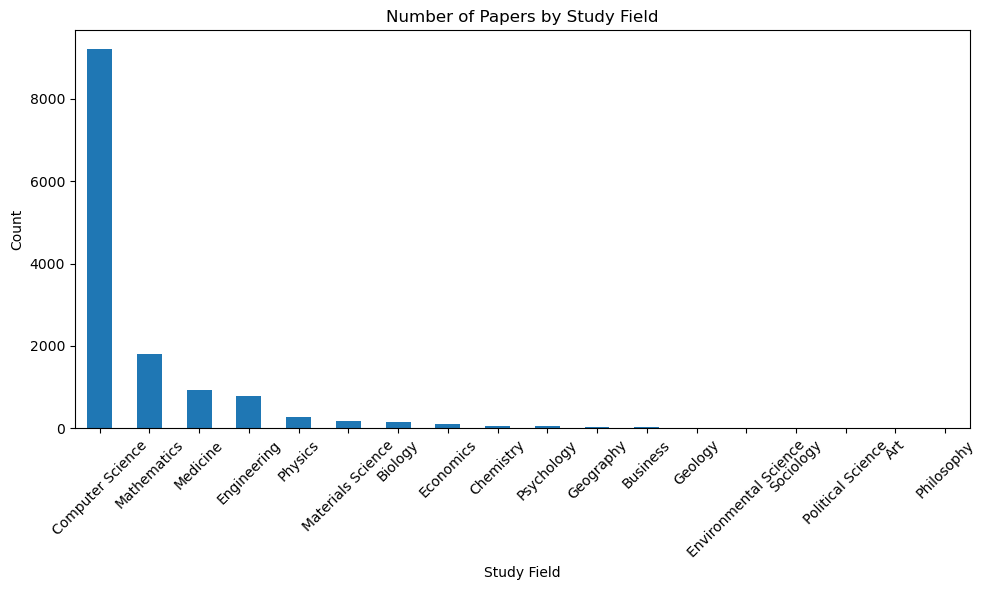

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

study_fields_counts = papers_df['fieldsOfStudy'].explode().value_counts()

plt.figure(figsize=(10, 6))
study_fields_counts.plot(kind='bar')
plt.title('Number of Papers by Study Field')
plt.xlabel('Study Field')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
unique_fields = papers_df['fieldsOfStudy'].explode().unique()

In [13]:
unique_fields = list(unique_fields)

In [14]:
len(unique_fields)

19

In [15]:
unique_fields

['Computer Science',
 'Engineering',
 None,
 'Mathematics',
 'Medicine',
 'Economics',
 'Business',
 'Physics',
 'Biology',
 'Psychology',
 'Geography',
 'Environmental Science',
 'Chemistry',
 'Materials Science',
 'Geology',
 'Political Science',
 'Sociology',
 'Art',
 'Philosophy']

In [157]:
user_field_ratio = []
for _, user in users_df.iterrows():
    favorite_papers = user['favorites']
    field_counts = {}

    for paper in favorite_papers:
        fields = papers_df.loc[papers_df['paperId'] == paper, 'fieldsOfStudy'].values[0]
        if fields:
            for field in fields:
                field_counts[field] = field_counts.get(field, 0) + 1

    total_papers = len(favorite_papers)
    field_ratio = {field: count / total_papers for field, count in field_counts.items()}
    user_field_ratio.append(field_ratio)

users_df['field_tendency'] = [[x.get(f, 0) for f in unique_fields] for x in user_field_ratio]

In [158]:
from sklearn.model_selection import train_test_split

train_users_df, test_users_df = train_test_split(users_df, test_size=0.2)

In [159]:
test_users_df.shape

(109, 4)

In [160]:
train_users_df.head()

,favorites,new_favorites,id,field_tendency
178,"[ebd0473f6c43cfd73d653c9919fa7b6285e2850b, 469...","[5cbadc7545b5296a8b245be20c78f8b9b628973c, ba8...",179,"[0.86, 0.14, 0, 0.08, 0.02, 0, 0, 0, 0.02, 0, ..."
412,"[2b13ffc8c770160f03cc72b6f2c9ad788243d988, 586...","[2714c11c0809d638e1e501831913671914407e5d, 590...",413,"[0.84, 0.16, 0, 0.02, 0, 0.02, 0, 0.04, 0.02, ..."
93,"[f5252075bb34666863cd01cc82c2d941d4ffe6c6, ef8...","[e82717bc04fd1143828d86236662aceae24b2d36, 67b...",94,"[0.86, 0.06, 0, 0.18, 0.18, 0, 0, 0.02, 0.06, ..."
67,"[451850bcc3dc33897564b57b1a732df350bab3d1, 1de...","[555e1eb9a171b70309c84d5c5db71e78e255c403, be5...",68,"[0.84, 0.04, 0, 0.32, 0.18, 0.02, 0, 0, 0.02, ..."
458,"[1255e08be4331e48760cbbacb8ed93ee0fe29151, cd9...","[2b6aa2226b8333b89a03c3f83e2d015a772f92a4, 79f...",459,"[0.78, 0.06, 0, 0.26, 0.18, 0.04, 0.02, 0.02, ..."


<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>روش Collaborative Filtering (۱۰ نمره)</b>
    </h2>
</font>
<font face="XB Zar" size=3>

در این راهکار سعی می‌کنیم با استفاده از کاربران مشابه با یک کاربر، سلیقه‌ی او را حدس بزنیم و مقالاتی را که کاربران مشابه دیده‌اند را به کاربر نمایش دهیم.

در این روش ابتدا باید $N$ کاربر که سلیقه‌ی مشابه با کاربر $x$ دارند را پیدا کنید، و با ترکیب لیست مقالات جدید مورد علاقه‌ی آن $N$ کاربر مشابه،
 ۱۰ مقاله‌ به کاربر $x$ پیشنهاد دهید.

توجه داشته باشید که برای اینکه شباهت دو کاربر را پیدا کنید، باید cosine_similarity بین بردار زمینه‌های مورد علاقه‌ی دو کاربر استفاده کنید. این بردار از $M$ درایه تشکیل شده است، که $M$ تعداد زمینه‌های یکتاییست که در داده‌ها وجود دارد. و در این بردار درایه‌ی $j$ام
نشان دهنده‌ی نسبت تعداد مقالات خوانده‌ی شده‌ کاربر در زمینه‌ی $j$ به تعداد کل مقاله‌های خوانده شده توسط او می‌باشد. (توجه کنید که هر مقاله می‌تواند چند زمینه داشته باشد و بنابراین حاصل جمع درایه‌های این بردار الزاما یک نمی‌باشد)

</font>
</div>

In [161]:
users_df.head()

,favorites,new_favorites,id,field_tendency
0,"[d9404b4a794c07b5e2cdf3203aabf06d70c6be9b, 656...","[94eebbefe8a37cf394be899b85af295c2e3a1f01, ee4...",1,"[0.78, 0.08, 0, 0.28, 0.22, 0, 0.02, 0, 0.06, ..."
1,"[81844300b993b53280083754a3860ecb59120eaf, a5d...","[87f95ab94bb19eb7716e0d4bbe0d37ca30f64157, 0dd...",2,"[0.9, 0.02, 0, 0.22, 0.1, 0, 0, 0, 0.04, 0.02,..."
2,"[3f3704d87860a816ac3cc7257a9acccf0d463b7a, 1ef...","[0dd2dafa9389f83160a63be3fde23b5d121a4786, c92...",3,"[0.82, 0.06, 0, 0.16, 0.1, 0, 0, 0.04, 0.04, 0..."
3,"[ef8c190afe11b0a73e1b3f1a989ec70e7bfd444d, b12...","[191cbd8198393aebaa15f2c1e4cdf116f9d58cb0, 682...",4,"[0.66, 0.04, 0, 0.22, 0.2, 0.02, 0.02, 0, 0.04..."
4,"[cb2cc1a7e8aaabaa8efa3c7e63b3c621ec6e062f, a47...","[3881ec4fad84887a03aeacdf46cec2e787656e8f, 757...",5,"[0.84, 0.06, 0, 0.12, 0.08, 0.04, 0, 0.04, 0.0..."


In [162]:
def recommend_articles(user_id, users, similar_users, top_k=10):
    article_pool = defaultdict(int)
    for similar_user in similar_users:
        liked_articles = users[users['id'] == similar_user].new_favorites.values[0]
        for article in liked_articles:
            article_pool[article] += 1
    sorted_articles = sorted(article_pool, key=article_pool.get, reverse=True)
    recommended_articles = sorted_articles[:top_k]
    return recommended_articles

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


def collaborative_filtering(users, user_id: int, field_tendency, N=10):
    """
    Returns the top 10 related articles to the user, based on similar users (Similar users should be on "train data").

    Parameters:
    user_id (int): The unique index of the user.
    N: The number of hyperparameter N in Nearest Neighbor algorithm.

    Returns:
    List[str]: A list of 10 article IDs that are most relevant to the user's interests.
    """
    field_tendency_list = list(users.field_tendency)
    ids = list(users.id)
    similarity_scores = cosine_similarity([field_tendency], field_tendency_list)[0]
    top_indices = [ids[x] for x in np.argsort(similarity_scores)[::-1][:10] if ids[x] != user_id]
    #     top_matches = [similarity_scores[index] for index in top_indices]
    return recommend_articles(user_id, users, top_indices, N)#%% raw
<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=5>
<p></p><p></p>
بسمه تعالی
<p></p>
</font>
<p></p>
<font>
<br>
درس بازیابی پیشرفته اطلاعات
<br>
مدرس: دکتر سلیمانی
</font>
<p></p>
<br>
<font>
<b>فاز سوم پروژه</b>
</font>
<br>
<br>
موعد تحویل:  ساعت ۶ صبح ۸ تیر<br>
<br>
<br>
<br>
<font>
دانشگاه صنعتی شریف
<br>
دانشکده مهندسی کامپیوتر
<br>
<br>
</font>
</div>
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>مقدمه</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    در این فاز از پروژه، تمرکز ما بر
    crawling
    و تحلیل مقالات استخراج‌شده از اینترنت خواهد بود. ما با بررسی تکنیک های مختلف
    web crawling
    برای استخراج مقالات و سایر اطلاعات مرتبط از وب شروع خواهیم کرد.
    <br>
    در مرحله بعد، الگوریتم های تجزیه و تحلیل  لینک مانند
    PageRank
    و
    HITS
    را برای تعیین اهمیت این مقالات بر اساس نقل قول‌ها، ارجاعات یا اشکال دیگر پیوندها اعمال خواهیم‌کرد. ما همچنین یاد خواهیم‌گرفت که چگونه یک الگوریتم
    PageRank
    شخصی‌سازی‌شده را پیاده‌سازی کنیم که ترجیحات کاربر را برای ارائه نتایج مرتبط تر در نظر می‌گیرد.
    <br>
    در بخش سوم این مرحله، یک موتور جستجوی شخصی‌سازی شده را پیاده‌سازی میکنیم و یاد می‌گیریم که چگونه موتور جستجویی بسازیم که نتایجی را بر اساس ترجیحات کاربر ارائه دهد.
    <br>
در نهایت، ما یک
    task
     در مورد
    recommendation system
    ها خواهیم‌داشت، که در آن از تکنیک های مختلف برای توصیه مقالات یا صفحات وب به کاربران بر اساس ترجیحات و رفتار آنها استفاده خواهیم کرد.
    <br>
     تنها زبان قابل قبول برای پروژه پایتون است. محدودیت استفاده از کتاب‌خانه‌های آماده در هر بخش مشخص شده است. در انتهای پروژه قرار است یک سیستم یکپارچه‌ی جست‌و‌جو داشته باشید، بنابراین به پیاده‌سازی هر چه بهتر این فاز توجه داشته باشید.
</font>
</div>


<div dir="rtl">
<font face="XB Zar" size=4>
    <h1>
    <b>پیاده‌سازی Crawler (۴۰ نمره)</b>
    </h1>
</font>
    <br>

<font face="XB Zar" size=3>
   در این بخش باید یک Crawler
    برای واکشی اطلاعات تعدادی مقاله از سایت <a href="https://www.semanticscholar.org/">Semantic Scholar</a> پیاده سازی کنید.
   اطلاعات واکشی شده باید حاوی موارد زیر باشد.
</font>
</div>
<br>
<table dir="ltr" style="width: 100%; border-collapse: collapse;">
  <tr>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">ID</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Title</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Abstract</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Publication Year</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Authors</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Related Topics</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Citation Count</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Reference Count</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">References</th>
  </tr>
  <tr>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Unique ID of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Title of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Abstract of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Publication year</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Name of the first author, ..., Name of the last author</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">topic1, topic2, ...</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">number of citations of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">number of references of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">ID of the first reference, ..., ID of the tenth reference</td>
  </tr>
</table>
    <br>

In [ ]:
!pip install gdown

In [ ]:
import time
import pprint
import json
from collections import defaultdict
from scipy import linalg
import numpy as np
import pandas as pd

In [ ]:
writers = ['Rabiee', 'Rohban', 'Sharifi', 'Soleymani', 'Kasaei']

In [ ]:
import gdown

In [ ]:
url = 'https://drive.google.com/drive/folders/1arkiPq89oR9iaQEHaECKKUmqAmwa5IaN?usp=sharing'
gdown.download_folder(url, quiet=True)

<div dir="rtl">

<font face="XB Zar" size=3>
  ابتدا فرایند واکشی را از ۵ مقاله‌ی هر استاد شروع کنید و
    ۱۰
    مرجع اول هر مقاله را به صف مقالات اضافه کنید.
    فرایند واکشی را نا جایی ادامه دهید که اطلاعات ۲۰۰۰ مقاله را داشته باشید.
    اطلاعات مقالات را در فایل crawled_paper_profName.json ذخیره کنید.
</font>
</div>

<div dir="rtl">

<font face="XB Zar" size=3>
  در پیاده سازی Crawler به موارد زیر دقت کنید.


<ul>
<li>حق استفاده از api سایت semantic scholar را ندارید.</li>
<li>برای واکشی می‌توانید از پکیج‌هایی مثل <a href="https://www.selenium.dev/selenium/docs/api/py/">Selenium</a> و یا <a href="https://github.com/scrapy/scrapy">Scrapy</a>  استفاده کنید. استفاده از پکیج‌های دیگر نیز مجاز است. همچنین برای پارس اطلاعات واکشی شده می‌توانید از پکیج <a href="https://pypi.org/project/beautifulsoup4/">Beautiful Soup</a> استفاده کنید.
</li>
<li>بین هر بار درخواست از سایت یک فاصله چند ثانیه‌ای بدهید.</li>
<li>در زمان تحویل کد Crawler شما اجرا خواهد شد و صحت آن بررسی خواهد شد.</li>
<li>در صورتی که ‌Crawler شما به دچار اروری مثل request timeout شد نباید کار خود را متوقف کند.</li>
</ul>


</font>
</div>

In [ ]:
!wget https: // dl.google.com/linux/linux_signing_key.pub
!sudo apt-key add linux_signing_key.pub
!echo 'deb [arch=amd64] http://dl.google.com/linux/chrome/deb/ stable main' >> /etc/apt/sources.list.d/google-chrome.list
!sudo apt-get -y update
!sudo apt-get install -y google-chrome-stable

In [ ]:
# install chromedriver
# !apt-get install -y qq unzip
!wget -O/tmp/chromedriver.zip http: // chromedriver.storage.googleapis.com/ `curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE` /chromedriver_linux64.zip
!unzip/tmp/chromedriver.zip chromedriver -d/usr/local/bin/

In [ ]:
# install selenium
!sudo apt install -y python3-selenium
!pip install selenium == 3.141.0 > /dev/null

In [ ]:
!google-chrome --version

In [ ]:
!chromedriver -v

In [ ]:
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from selenium.webdriver.common.by import By
from PIL import Image
from selenium.webdriver.common.action_chains import ActionChains

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("--window-size=1920,1080")
driver = webdriver.Chrome(options=chrome_options)

In [ ]:
paper_urls = defaultdict(list)

for writer in writers:
    with open(f'/kaggle/working/HW3/{writer}.txt', "r") as f:
        for url in f:
            paper_urls[writer].append((url, None))

In [ ]:
paper_urls[writers[0]][2]

In [ ]:
def parese_one_paper(url):
    driver.get(url)
    title = driver.find_element(By.CSS_SELECTOR, "h1[data-test-id='paper-detail-title']").text
    id_element = driver.find_elements(By.CSS_SELECTOR, "li[data-test-id='corpus-id']")
    if id_element:
        paper_id = id_element[0].text[len('Corpus ID: '):]
    else:
        paper_id = ''
    expand_button = driver.find_elements(By.CSS_SELECTOR, "button[data-test-id='text-truncator-toggle']")
    if expand_button:
        expand_button[0].click()
    abstract_element = driver.find_elements(By.CSS_SELECTOR, ".text-truncator.abstract__text.text--preline")
    if abstract_element:
        abstract = abstract_element[0].text.rstrip(' \nCollapse')
    else:
        abstract = ''
    date = driver.find_element(By.CSS_SELECTOR, "span[data-test-id='paper-year']").text

    expand_authors_button = driver.find_elements(By.CSS_SELECTOR, "button[data-test-id='author-list-expand']")
    if expand_authors_button:
        ActionChains(driver).move_to_element(expand_authors_button[0]).click().perform()
    authors = [x.strip().rstrip(" less") for x in driver.find_element(By.CSS_SELECTOR, ".author-list").text.split(',')]
    citation_element = driver.find_elements(By.CSS_SELECTOR, ".scorecard-stat__headline__dark")
    if citation_element:
        citation_count = citation_element[0].text.rstrip(' Citations')
    else:
        citation_count = ''
    references_count = driver.find_element(By.XPATH, '''//*[@id="cited-papers"]/div[1]/div/div/h2''').text.rstrip(
        ' References')
    references = driver.find_element(By.XPATH, '''//*[@id="cited-papers"]/div[2]/div/div[1]''')
    references_list = references.find_elements(By.CSS_SELECTOR, ".link-button--show-visited")
    reference_urls = []
    for reference in references_list:
        reference_urls.append(reference.get_attribute('href'))

    related = driver.find_element(By.CSS_SELECTOR, ".flex-container.similar-papers__body")
    related_papers = related.find_elements(By.CSS_SELECTOR, '.cl-container')
    print(related_papers, related)
    related_urls = [element.get_attribute("href") for element in related_papers]

    paper_urls[writer] += [(x, paper_id) for x in reference_urls]
    paper_data = {
        'paper_id': paper_id,
        'title': title,
        'abstract': abstract,
        'date': date,
        'authors': authors,
        'citation_count': citation_count,
        'references_count': references_count,
        'reference_ids': [],
        'related_papers': related_urls
    }
    return paper_data

In [ ]:
pp = pprint.PrettyPrinter(indent=4)

c = 0
for writer in writers:
    crawled_datas = {}
    print(writer)
    c = 0
    for url, father in paper_urls[writer][:2]:
        if c >= 400:
            break
        try:
            time.sleep(10)
            data = parese_one_paper(url)
            print(data)
            crawled_datas[data['paper_id']] = data
            if father:
                crawled_datas[father]['reference_ids'].append(data['paper_id'])
            if c % 20 == 0:
                print(c)
            c += 1
        except Exception as e:
            print(e, url)
        with open(f"crawled_paper_{writer}.json", "w") as f:
            json.dump(crawled_datas, f)

In [ ]:
crawled_datas

<div dir="rtl">
<font face="XB Zar" size=4>
    <h1>
    <b>PageRank
        شخصی‌سازی‌شده
        (۲۰ نمره)</b>
    </h1>
</font>
    <br>
<font face="XB Zar" size=3>
در این بخش، الگوریتم
    PageRank
    شخصی‌سازی‌شده را پیاده‌سازی می‌کنیم که توسعه‌ای از الگوریتم
    PageRank
    است که ترجیحات کاربر را در نظر می‌گیرد. الگوریتم
    PageRank
    شخصی‌سازی‌شده گره‌ها را در یک گراف بر اساس اهمیت آنها برای کاربر رتبه‌بندی می‌کند، نه بر اساس اهمیت کلی آنها در نمودار.

</font>
</div>

In [ ]:
url = "https://drive.google.com/drive/folders/1Kl_W1zhqfd1kNyKZ_NR5N9YK1gof6TXl"
gdown.download_folder(url, quiet=True)

In [ ]:
def create_adjacency_matrix(nodes):
    node_ids = set()
    for node in nodes:
        node_ids.add(nodes[node]["paper_id"])
        node_ids.update(nodes[node]["reference_ids"])

    id_to_index = {node_id: index for index, node_id in enumerate(node_ids)}

    matrix_size = len(node_ids)
    adjacency_matrix = [[0] * matrix_size for _ in range(matrix_size)]

    for node in nodes:
        n = len(nodes[node]["reference_ids"])
        source_index = id_to_index[nodes[node]["paper_id"]]
        for destination_id in nodes[node]["reference_ids"]:
            destination_index = id_to_index[destination_id]
            adjacency_matrix[source_index][destination_index] = 1 / n

    return adjacency_matrix, id_to_index


In [ ]:
from typing import Dict, List


def pagerank(graph: Dict[str, List[str]]) -> Dict[str, float]:
    """
    Returns the personalized PageRank scores for the nodes in the graph, given the user's preferences.

    Parameters:
    graph (Dict[str, List[str]]): The graph represented as a dictionary of node IDs and their outgoing edges.

    Returns:
    Dict[str, float]: A dictionary of node IDs and their personalized PageRank scores.
    """
    adjacency_matrix, id_to_index = create_adjacency_matrix(graph)
    adjacency_matrix = np.array(adjacency_matrix)
    P = 0.9 * adjacency_matrix + 0.1 * (1 / len(graph))
    w, vl = linalg.eig(P)
    largest_eigenvector = vl[:, np.argmax(w)]
    index_to_id = {v: k for k, v in id_to_index.items()}
    result = {index_to_id[i]: v for i, v in enumerate(largest_eigenvector)}
    result = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse=True)}

    return result

<div dir="rtl">
<font face="XB Zar" size=3>
در این بخش از الگوریتم
PageRank
شخصی‌سازی‌شده که در قسمت قبلی پیاده‌سازی شده‌است برای
شناسایی مقالات مهم مرتبط با حوزه‌ی کاری یک استاد
خاص استفاده می‌کنیم. این تابع، یک
    field
    را به عنوان ورودی دریافت می‌کند. خروجی نیز
مقالات برتری که بیشترین ارتباط را با آن زمینه دارند؛ خواهدبود.
</font>
</div>

In [ ]:
from itertools import islice


def important_articles(Professor: str) -> List[str]:
    """
    Returns the most important articles in the field of given professor, based on the personalized PageRank scores.

    Parameters:
    Professor (str): Professor's name.

    Returns:
    List[str]: A list of article IDs representing the most important articles in the field of given professor.
    """
    with open(f'/kaggle/working/crawled_data/crawled_paper_{Professor}.json') as f:
        papers = json.load(f)
        pr = pagerank(papers)
        return [{k, pr[k]} for k in list(pr.keys())[:10]]

In [ ]:
important_articles('Soleymani')

<div dir="rtl">
<font face="XB Zar" size=4>
    <h1>
    <b>جستجو شخصی‌سازی‌شده (۱۰ نمره)</b>
    </h1>
</font>
    <br>
<font face="XB Zar" size=3>
الگوریتم جست‌و‌جویی که در فازهای گذشته پیاده‌سازی کرده‌اید را به گونه‌ای تغییر دهید که نتایج به دست آمده جست‌و‌جو بر حسب علایق فرد مرتب شوند. از قضیه‌ی خطی بودن برای این کار استفاده کنید.

</font>
</div>

In [6]:
from phase1 import *
from ast import literal_eval

In [7]:
def create_writer_df(writer_papers):
    for p in writer_papers:
        writer_papers[p]['title'] = clean_data(writer_papers[p]['title'])
        writer_papers[p]['abstract'] = clean_data(writer_papers[p]['abstract'])

    df = pd.DataFrame([{k: v[k] for k in ['title', 'abstract', 'paper_id']} for p, v in writer_papers.items()])
    return df

In [8]:
datasets = {}
for writer in writers:
    with open(f'./crawled_data/crawled_paper_{writer}.json', 'r') as f:
        papers = json.load(f)
        df = create_writer_df(papers)
        datasets[writer] = df

In [9]:
datasets[writers[0]].head()

,title,abstract,paper_id
0,"[spatial, aware, dictionary, learn, for, hyper...","[this, paper, present, a, structure, dictionar...",9281781
1,"[multiresolution, knowledge, distillation, for...","[unsupervised, representation, learn, have, pr...",227126845
2,"[a, hybrid, deep, learn, architecture, for, pr...","[internet, of, thing, iot, device, and, applic...",4909695
3,"[novel, dataset, for, fine, grain, abnormal, b...","[despite, the, huge, research, on, crowd, on, ...",34979781
4,"[deep, private, feature, extraction]","[we, present, and, evaluate, deep, private, fe...",11527748


In [10]:
stop_words = find_stop_words(
    [' '.join(item) for item in [[' '.join(item) for item in list(x.abstract)] for x in datasets]])
stop_words_list = [x[0] for x in stop_words]

AttributeError: 'str' object has no attribute 'abstract'

In [ ]:
all_positional_index = {}
all_doc_dicts = {}

for writer in writers:
    doc_dict = create_paper_id_map(df=df, stop_words_list=stop_words_list)

In [ ]:
from typing import List, Tuple


def search(title_query: str, abstract_query: str, max_result_count: int, method: str = 'ltn-lnn', weight: float = 0.5,
           print=False, preferred_field: str = None):
    """
        Finds relevant documents to query

        Parameters
        ---------------------------------------------------------------------------------------------------
        max_result_count: Return top 'max_result_count' docs which have the highest scores.
                          notice that if max_result_count = -1, then you have to return all docs

        mode: 'detailed' for searching in title and text separately.
              'overall' for all words, and weighted by where the word appears on.

        where: when mode ='detailed', when we want search query
                in title or text not both of them at the same time.

        method: 'ltn-lnn' or 'ltc-lnc' or 'okapi25'

        preferred_field: A list containing preference rate to Dr. Rabiee, Dr. Soleymani, Dr. Rohban,
                         Dr. Kasaei, and Dr. Sharifi's papers, respectively.

        Returns
        ----------------------------------------------------------------------------------------------------
        list
        Retrieved documents with snippet
    """
    # TODO: return top 'max_result_count' documents for your searched query
    result = ["a72d6bd0b6d9b7aee66e91253bc6c6de37fa4e6a"]

    return result


<div dir="rtl" style="text-align: justify">
<font face="XB Zar" size=4>
    <h1>
    <b>رتبه‌بندی نویسندگان (۲۵ نمره)</b>
    </h1>
</font>
    <br>
<font face="XB Zar" size=3>
    برای رتبه‌بندی نویسندگان، مفهوم ارجاع نویسندگان به یکدیگر مطرح می‌شود. زمانی که نویسنده A در مقاله خود به مقاله P که نویسنده B جزو نویسندگان آن مقاله یعنی مقاله P می‌باشد، ارجاع دهد، می‌گوییم که نویسنده A به نویسنده B ارجاع داده است. با توجه به این رابطه، می‌توان گراف ارجاعات بین نویسندگان را ایجاد و سپس با استفاده از الگوریتم HITS
نویسندگان را رتبه‌بندی کرد. برای رتبه‌بندی نیاز است تا از شاخص‌های hub و authority استفاده کنیم.


</font>
</div>

In [ ]:
crawled_papers = {}
for writer in writers:
    with open(f'/kaggle/working/crawled_data/crawled_paper_{writer}.json', "r") as f:
        crawled_papers = dict(crawled_papers, **json.load(f))  #%% raw
< div
style = "direction:rtl;line-height:300%;" >
< font
face = "XB Zar"
size = 5 >
< div
align = center >
< font
face = "B Titr"
size = 5 >
< p > </p > < p > < /p >
بسمه
تعالی
< p > </p >
< /font >
< p > </p >
< font >
< br >
درس
بازیابی
پیشرفته
اطلاعات
< br >
مدرس: دکتر
سلیمانی
< /font >
< p > </p >
< br >
< font >
< b > فاز
سوم
پروژه </b >
< /font >
< br >
< br >
موعد
تحویل: ساعت ۶ صبح ۸ تیر < br >
< br >
< br >
< br >
< font >
دانشگاه
صنعتی
شریف
< br >
دانشکده
مهندسی
کامپیوتر
< br >
< br >
< /font >
< /div >
< /font >
< /div >

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>مقدمه</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    در این فاز از پروژه، تمرکز ما بر
    crawling
    و تحلیل مقالات استخراج‌شده از اینترنت خواهد بود. ما با بررسی تکنیک های مختلف
    web crawling
    برای استخراج مقالات و سایر اطلاعات مرتبط از وب شروع خواهیم کرد.
    <br>
    در مرحله بعد، الگوریتم های تجزیه و تحلیل  لینک مانند
    PageRank
    و
    HITS
    را برای تعیین اهمیت این مقالات بر اساس نقل قول‌ها، ارجاعات یا اشکال دیگر پیوندها اعمال خواهیم‌کرد. ما همچنین یاد خواهیم‌گرفت که چگونه یک الگوریتم
    PageRank
    شخصی‌سازی‌شده را پیاده‌سازی کنیم که ترجیحات کاربر را برای ارائه نتایج مرتبط تر در نظر می‌گیرد.
    <br>
    در بخش سوم این مرحله، یک موتور جستجوی شخصی‌سازی شده را پیاده‌سازی میکنیم و یاد می‌گیریم که چگونه موتور جستجویی بسازیم که نتایجی را بر اساس ترجیحات کاربر ارائه دهد.
    <br>
در نهایت، ما یک
    task
     در مورد
    recommendation system
    ها خواهیم‌داشت، که در آن از تکنیک های مختلف برای توصیه مقالات یا صفحات وب به کاربران بر اساس ترجیحات و رفتار آنها استفاده خواهیم کرد.
    <br>
     تنها زبان قابل قبول برای پروژه پایتون است. محدودیت استفاده از کتاب‌خانه‌های آماده در هر بخش مشخص شده است. در انتهای پروژه قرار است یک سیستم یکپارچه‌ی جست‌و‌جو داشته باشید، بنابراین به پیاده‌سازی هر چه بهتر این فاز توجه داشته باشید.
</font>
</div>


<div dir="rtl">
<font face="XB Zar" size=4>
    <h1>
    <b>پیاده‌سازی Crawler (۴۰ نمره)</b>
    </h1>
</font>
    <br>

<font face="XB Zar" size=3>
   در این بخش باید یک Crawler
    برای واکشی اطلاعات تعدادی مقاله از سایت <a href="https://www.semanticscholar.org/">Semantic Scholar</a> پیاده سازی کنید.
   اطلاعات واکشی شده باید حاوی موارد زیر باشد.
</font>
</div>
<br>
<table dir="ltr" style="width: 100%; border-collapse: collapse;">
  <tr>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">ID</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Title</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Abstract</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Publication Year</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Authors</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Related Topics</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Citation Count</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Reference Count</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">References</th>
  </tr>
  <tr>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Unique ID of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Title of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Abstract of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Publication year</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Name of the first author, ..., Name of the last author</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">topic1, topic2, ...</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">number of citations of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">number of references of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">ID of the first reference, ..., ID of the tenth reference</td>
  </tr>
</table>
    <br>

In [ ]:
!pip install gdown

In [ ]:
import time
import pprint
import json
from collections import defaultdict
from scipy import linalg
import numpy as np
import pandas as pd

In [ ]:
writers = ['Rabiee', 'Rohban', 'Sharifi', 'Soleymani', 'Kasaei']

In [ ]:
import gdown

In [ ]:
url = 'https://drive.google.com/drive/folders/1arkiPq89oR9iaQEHaECKKUmqAmwa5IaN?usp=sharing'
gdown.download_folder(url, quiet=True)

<div dir="rtl">

<font face="XB Zar" size=3>
  ابتدا فرایند واکشی را از ۵ مقاله‌ی هر استاد شروع کنید و
    ۱۰
    مرجع اول هر مقاله را به صف مقالات اضافه کنید.
    فرایند واکشی را نا جایی ادامه دهید که اطلاعات ۲۰۰۰ مقاله را داشته باشید.
    اطلاعات مقالات را در فایل crawled_paper_profName.json ذخیره کنید.
</font>
</div>

<div dir="rtl">

<font face="XB Zar" size=3>
  در پیاده سازی Crawler به موارد زیر دقت کنید.


<ul>
<li>حق استفاده از api سایت semantic scholar را ندارید.</li>
<li>برای واکشی می‌توانید از پکیج‌هایی مثل <a href="https://www.selenium.dev/selenium/docs/api/py/">Selenium</a> و یا <a href="https://github.com/scrapy/scrapy">Scrapy</a>  استفاده کنید. استفاده از پکیج‌های دیگر نیز مجاز است. همچنین برای پارس اطلاعات واکشی شده می‌توانید از پکیج <a href="https://pypi.org/project/beautifulsoup4/">Beautiful Soup</a> استفاده کنید.
</li>
<li>بین هر بار درخواست از سایت یک فاصله چند ثانیه‌ای بدهید.</li>
<li>در زمان تحویل کد Crawler شما اجرا خواهد شد و صحت آن بررسی خواهد شد.</li>
<li>در صورتی که ‌Crawler شما به دچار اروری مثل request timeout شد نباید کار خود را متوقف کند.</li>
</ul>


</font>
</div>

In [ ]:
!wget https: // dl.google.com/linux/linux_signing_key.pub
!sudo apt-key add linux_signing_key.pub
!echo 'deb [arch=amd64] http://dl.google.com/linux/chrome/deb/ stable main' >> /etc/apt/sources.list.d/google-chrome.list
!sudo apt-get -y update
!sudo apt-get install -y google-chrome-stable

In [ ]:
# install chromedriver
# !apt-get install -y qq unzip
!wget -O/tmp/chromedriver.zip http: // chromedriver.storage.googleapis.com/ `curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE` /chromedriver_linux64.zip
!unzip/tmp/chromedriver.zip chromedriver -d/usr/local/bin/

In [ ]:
# install selenium
!sudo apt install -y python3-selenium
!pip install selenium == 3.141.0 > /dev/null

In [ ]:
!google-chrome --version

In [ ]:
!chromedriver -v

In [ ]:
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from selenium.webdriver.common.by import By
from PIL import Image
from selenium.webdriver.common.action_chains import ActionChains

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("--window-size=1920,1080")
driver = webdriver.Chrome(options=chrome_options)

In [ ]:
paper_urls = defaultdict(list)

for writer in writers:
    with open(f'/kaggle/working/HW3/{writer}.txt', "r") as f:
        for url in f:
            paper_urls[writer].append((url, None))

In [ ]:
paper_urls[writers[0]][2]

In [ ]:
def parese_one_paper(url):
    driver.get(url)
    title = driver.find_element(By.CSS_SELECTOR, "h1[data-test-id='paper-detail-title']").text
    id_element = driver.find_elements(By.CSS_SELECTOR, "li[data-test-id='corpus-id']")
    if id_element:
        paper_id = id_element[0].text[len('Corpus ID: '):]
    else:
        paper_id = ''
    expand_button = driver.find_elements(By.CSS_SELECTOR, "button[data-test-id='text-truncator-toggle']")
    if expand_button:
        expand_button[0].click()
    abstract_element = driver.find_elements(By.CSS_SELECTOR, ".text-truncator.abstract__text.text--preline")
    if abstract_element:
        abstract = abstract_element[0].text.rstrip(' \nCollapse')
    else:
        abstract = ''
    date = driver.find_element(By.CSS_SELECTOR, "span[data-test-id='paper-year']").text

    expand_authors_button = driver.find_elements(By.CSS_SELECTOR, "button[data-test-id='author-list-expand']")
    if expand_authors_button:
        ActionChains(driver).move_to_element(expand_authors_button[0]).click().perform()
    authors = [x.strip().rstrip(" less") for x in driver.find_element(By.CSS_SELECTOR, ".author-list").text.split(',')]
    citation_element = driver.find_elements(By.CSS_SELECTOR, ".scorecard-stat__headline__dark")
    if citation_element:
        citation_count = citation_element[0].text.rstrip(' Citations')
    else:
        citation_count = ''
    references_count = driver.find_element(By.XPATH, '''//*[@id="cited-papers"]/div[1]/div/div/h2''').text.rstrip(
        ' References')
    references = driver.find_element(By.XPATH, '''//*[@id="cited-papers"]/div[2]/div/div[1]''')
    references_list = references.find_elements(By.CSS_SELECTOR, ".link-button--show-visited")
    reference_urls = []
    for reference in references_list:
        reference_urls.append(reference.get_attribute('href'))

    related = driver.find_element(By.CSS_SELECTOR, ".flex-container.similar-papers__body")
    related_papers = related.find_elements(By.CSS_SELECTOR, '.cl-container')
    print(related_papers, related)
    related_urls = [element.get_attribute("href") for element in related_papers]

    paper_urls[writer] += [(x, paper_id) for x in reference_urls]
    paper_data = {
        'paper_id': paper_id,
        'title': title,
        'abstract': abstract,
        'date': date,
        'authors': authors,
        'citation_count': citation_count,
        'references_count': references_count,
        'reference_ids': [],
        'related_papers': related_urls
    }
    return paper_data

In [ ]:
pp = pprint.PrettyPrinter(indent=4)

c = 0
for writer in writers:
    crawled_datas = {}
    print(writer)
    c = 0
    for url, father in paper_urls[writer][:2]:
        if c >= 400:
            break
        try:
            time.sleep(10)
            data = parese_one_paper(url)
            print(data)
            crawled_datas[data['paper_id']] = data
            if father:
                crawled_datas[father]['reference_ids'].append(data['paper_id'])
            if c % 20 == 0:
                print(c)
            c += 1
        except Exception as e:
            print(e, url)
        with open(f"crawled_paper_{writer}.json", "w") as f:
            json.dump(crawled_datas, f)

In [ ]:
crawled_datas

<div dir="rtl">
<font face="XB Zar" size=4>
    <h1>
    <b>PageRank
        شخصی‌سازی‌شده
        (۲۰ نمره)</b>
    </h1>
</font>
    <br>
<font face="XB Zar" size=3>
در این بخش، الگوریتم
    PageRank
    شخصی‌سازی‌شده را پیاده‌سازی می‌کنیم که توسعه‌ای از الگوریتم
    PageRank
    است که ترجیحات کاربر را در نظر می‌گیرد. الگوریتم
    PageRank
    شخصی‌سازی‌شده گره‌ها را در یک گراف بر اساس اهمیت آنها برای کاربر رتبه‌بندی می‌کند، نه بر اساس اهمیت کلی آنها در نمودار.

</font>
</div>

In [ ]:
url = "https://drive.google.com/drive/folders/1Kl_W1zhqfd1kNyKZ_NR5N9YK1gof6TXl"
gdown.download_folder(url, quiet=True)

In [ ]:
def create_adjacency_matrix(nodes):
    node_ids = set()
    for node in nodes:
        node_ids.add(nodes[node]["paper_id"])
        node_ids.update(nodes[node]["reference_ids"])

    id_to_index = {node_id: index for index, node_id in enumerate(node_ids)}

    matrix_size = len(node_ids)
    adjacency_matrix = [[0] * matrix_size for _ in range(matrix_size)]

    for node in nodes:
        n = len(nodes[node]["reference_ids"])
        source_index = id_to_index[nodes[node]["paper_id"]]
        for destination_id in nodes[node]["reference_ids"]:
            destination_index = id_to_index[destination_id]
            adjacency_matrix[source_index][destination_index] = 1 / n

    return adjacency_matrix, id_to_index


In [ ]:
from typing import Dict, List


def pagerank(graph: Dict[str, List[str]]) -> Dict[str, float]:
    """
    Returns the personalized PageRank scores for the nodes in the graph, given the user's preferences.

    Parameters:
    graph (Dict[str, List[str]]): The graph represented as a dictionary of node IDs and their outgoing edges.

    Returns:
    Dict[str, float]: A dictionary of node IDs and their personalized PageRank scores.
    """
    adjacency_matrix, id_to_index = create_adjacency_matrix(graph)
    adjacency_matrix = np.array(adjacency_matrix)
    P = 0.9 * adjacency_matrix + 0.1 * (1 / len(graph))
    w, vl = linalg.eig(P)
    largest_eigenvector = vl[:, np.argmax(w)]
    index_to_id = {v: k for k, v in id_to_index.items()}
    result = {index_to_id[i]: v for i, v in enumerate(largest_eigenvector)}
    result = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse=True)}

    return result

<div dir="rtl">
<font face="XB Zar" size=3>
در این بخش از الگوریتم
PageRank
شخصی‌سازی‌شده که در قسمت قبلی پیاده‌سازی شده‌است برای
شناسایی مقالات مهم مرتبط با حوزه‌ی کاری یک استاد
خاص استفاده می‌کنیم. این تابع، یک
    field
    را به عنوان ورودی دریافت می‌کند. خروجی نیز
مقالات برتری که بیشترین ارتباط را با آن زمینه دارند؛ خواهدبود.
</font>
</div>

In [ ]:
from itertools import islice


def important_articles(Professor: str) -> List[str]:
    """
    Returns the most important articles in the field of given professor, based on the personalized PageRank scores.

    Parameters:
    Professor (str): Professor's name.

    Returns:
    List[str]: A list of article IDs representing the most important articles in the field of given professor.
    """
    with open(f'/kaggle/working/crawled_data/crawled_paper_{Professor}.json') as f:
        papers = json.load(f)
        pr = pagerank(papers)
        return [{k, pr[k]} for k in list(pr.keys())[:10]]

In [ ]:
important_articles('Soleymani')

<div dir="rtl">
<font face="XB Zar" size=4>
    <h1>
    <b>جستجو شخصی‌سازی‌شده (۱۰ نمره)</b>
    </h1>
</font>
    <br>
<font face="XB Zar" size=3>
الگوریتم جست‌و‌جویی که در فازهای گذشته پیاده‌سازی کرده‌اید را به گونه‌ای تغییر دهید که نتایج به دست آمده جست‌و‌جو بر حسب علایق فرد مرتب شوند. از قضیه‌ی خطی بودن برای این کار استفاده کنید.

</font>
</div>

In [ ]:
from phase1 import *
from ast import literal_eval

In [ ]:
def create_writer_df(writer_papers):
    for p in writer_papers:
        writer_papers[p]['title'] = clean_data(writer_papers[p]['title'])
        writer_papers[p]['abstract'] = clean_data(writer_papers[p]['abstract'])

    df = pd.DataFrame([{k: v[k] for k in ['title', 'abstract'], 'id': p} for p, v in writer_papers.items()])

In [ ]:
datasets = {}
for writer in writers:
    with open(f'./crawled_data/crawled_paper_{writer}.json', 'r') as f:
        papers = json.load(f)


In [ ]:
from typing import List, Tuple


def search(title_query: str, abstract_query: str, max_result_count: int, method: str = 'ltn-lnn', weight: float = 0.5,
           print=False, preferred_field: str = None):
    """
        Finds relevant documents to query

        Parameters
        ---------------------------------------------------------------------------------------------------
        max_result_count: Return top 'max_result_count' docs which have the highest scores.
                          notice that if max_result_count = -1, then you have to return all docs

        mode: 'detailed' for searching in title and text separately.
              'overall' for all words, and weighted by where the word appears on.

        where: when mode ='detailed', when we want search query
                in title or text not both of them at the same time.

        method: 'ltn-lnn' or 'ltc-lnc' or 'okapi25'

        preferred_field: A list containing preference rate to Dr. Rabiee, Dr. Soleymani, Dr. Rohban,
                         Dr. Kasaei, and Dr. Sharifi's papers, respectively.

        Returns
        ----------------------------------------------------------------------------------------------------
        list
        Retrieved documents with snippet
    """
    # TODO: return top 'max_result_count' documents for your searched query
    result = ["a72d6bd0b6d9b7aee66e91253bc6c6de37fa4e6a"]

    return result


<div dir="rtl" style="text-align: justify">
<font face="XB Zar" size=4>
    <h1>
    <b>رتبه‌بندی نویسندگان (۲۵ نمره)</b>
    </h1>
</font>
    <br>
<font face="XB Zar" size=3>
    برای رتبه‌بندی نویسندگان، مفهوم ارجاع نویسندگان به یکدیگر مطرح می‌شود. زمانی که نویسنده A در مقاله خود به مقاله P که نویسنده B جزو نویسندگان آن مقاله یعنی مقاله P می‌باشد، ارجاع دهد، می‌گوییم که نویسنده A به نویسنده B ارجاع داده است. با توجه به این رابطه، می‌توان گراف ارجاعات بین نویسندگان را ایجاد و سپس با استفاده از الگوریتم HITS
نویسندگان را رتبه‌بندی کرد. برای رتبه‌بندی نیاز است تا از شاخص‌های hub و authority استفاده کنیم.


</font>
</div>

In [ ]:
crawled_papers = {}
for writer in writers:
    with open(f'/kaggle/working/crawled_data/crawled_paper_{writer}.json', "r") as f:
        crawled_papers = dict(crawled_papers, **json.load(f))

In [ ]:
crawled_papers['701890']

In [ ]:
for k in crawled_papers:
    crawled_papers[k]['authors'] = [x.strip() for x in crawled_papers[k]['authors'].split(',') if 'authors' not in x]

In [ ]:
def create_authors_adjacency_matrix(nodes):
    authors = set()
    for node in nodes:
        authors.update(nodes[node]['authors'])

    name_to_index = {author: index for index, author in enumerate(authors)}

    matrix_size = len(authors)
    adjacency_matrix = [[0] * matrix_size for _ in range(matrix_size)]

    for node in nodes:
        for author in nodes[node]["authors"]:
            source_index = name_to_index[author]
            for destination_id in nodes[node]["reference_ids"]:
                if nodes.get(destination_id):
                    for ref_author in nodes[destination_id]['authors']:
                        destination_index = name_to_index[ref_author]
                        adjacency_matrix[source_index][destination_index] = 1

    return adjacency_matrix, name_to_index

In [ ]:
import networkx as nx
import networkx as nx


def hit_algorithm(papers, n):
    """
        Implementing the HITS algorithm to score authors based on their papers and co-authors.

        Parameters
        ---------------------------------------------------------------------------------------------------
        papers: A list of paper dictionaries with the following keys:
                "id": A unique ID for the paper
                "title": The title of the paper
                "abstract": The abstract of the paper
                "date": The year in which the paper was published
                "authors": A list of the names of the authors of the paper
                "related_topics": A list of IDs for related topics (optional)
                "citation_count": The number of times the paper has been cited (optional)
                "reference_count": The number of references in the paper (optional)
                "references": A list of IDs for papers that are cited in the paper (optional)
        n: An integer representing the number of top authors to return.

        Returns
        ---------------------------------------------------------------------------------------------------
        List
        list of the top n authors based on their hub scores.
    """
    # Create a graph of authors and papers (all of the authors and papers represented as nodes, and all of the authors who wrote each paper connected to the corresponding paper node by an edge)
    adjacency_matrix, name_to_index = create_authors_adjacency_matrix(papers)
    adjacency_matrix = np.array(adjacency_matrix)
    index_to_name = {v: k for k, v in name_to_index.items()}
    # Run the HITS algorithm
    AAT = np.dot(adjacency_matrix, adjacency_matrix.T)
    ATA = np.dot(adjacency_matrix.T, adjacency_matrix)
    h_w, hubs = linalg.eig(AAT)
    hubs = hubs[:, np.argmax(h_w)]
    a_w, authorities = linalg.eig(ATA)
    authorities = authorities[:, np.argmax(a_w)]
    # Create a list of top n authors based on their hub scores
    top_authors = authorities.argsort()[-n:][::-1]
    return [index_to_name[t] for t in top_authors]

In [ ]:
# call the hit_algorithm function
top_authors = hit_algorithm(crawled_papers, 2)

# print the top authors
print(top_authors)

<div dir="rtl">
<font face="XB Zar" size=4>
    <h1>
    <b>سیستم پیشنهادگر (۲۰ نمره)</b>
    </h1>
</font>
<font face="XB Zar" size=3>

در این بخش سعی می‌کنیم که یک سیستم پیشنهادگر مقالات بر اساس جست‌و‌جو‌ها یا علايق یک کاربر پیاده‌سازی کنیم، سیستم پیشنهاد دهنده‌ای که قصد داریم آن را ایجاد کنیم،‌ باید بتواند بر اساس لیستی از مقالاتی که کاربر قبلا آن‌ها را مطالعه کرده یا به آن‌ها علاقه داشته است، مقالات تازه انتشار یافته‌‌ی جدید را به کاربر پیشنهاد دهد.

در فایل recommended_papers.json
لیستی از کاربران قرار دارد که در فیلد positive_papers هر کاربر،
تعداد ۵۰ مقاله از مقالاتی که کاربر به آن‌ها علاقه داشته است مشخص شده است. و همچینین در فیلد recommendedPapers هر کاربر تعداد ۱۰ مقاله به ترتیب اهمیت، از مقالات جدیدی که کاربر آن‌ها را پسندیده است قرار دارد.

در این بخش هدف شما یادگیری سیستم پیشنهاد‌ دهنده بر اساس همین داده‌ها می‌باشد، و به عبارتی شما بایستی کاربر‌ها را به دو دسته آموزش و آزمایش تقسیم کنید، و بر اساس داده‌های آموزشی بتوانید مقالات جدید مورد پسند کاربرهای آزمایش را پیش‌بینی کنید. (بنابراین در این پیش‌بینی نمی‌توانید از فیلد recommendedPapers این کاربران استفاده کنید.)

</font>
</div>

In [ ]:
import json

with open('/kaggle/working/HW3/recommended_papers.json', 'r') as fp:
    recommended_papers = json.load(fp)

In [ ]:
sample_user = recommended_papers[0]

In [ ]:
sample_user.keys()

In [ ]:
print(sample_user['positive_papers'][0]['paperId'])
print(sample_user['positive_papers'][0]['title'])
print(sample_user['positive_papers'][0]['abstract'])
print(sample_user['positive_papers'][0]['fieldsOfStudy'])
print(sample_user['recommendedPapers'][0])

In [ ]:
users_df = pd.DataFrame(
    [{
        'favorites': [x['paperId'] for x in user['positive_papers']],
        'new_favorites': [x['paperId'] for x in user['recommendedPapers']],
        'id': i + 1
    } for i, user in enumerate(recommended_papers)])

In [ ]:
all_papers_list = [user['positive_papers'] for user in recommended_papers] + [user['recommendedPapers'] for user in
                                                                              recommended_papers]
all_papers_list = [paper for l in all_papers_list for paper in l]
papers_df = pd.DataFrame(all_papers_list)
papers_df = papers_df.drop_duplicates(subset=['paperId'], keep='last')

In [ ]:
papers_df.head()

In [ ]:
users_df.head()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

study_fields_counts = papers_df['fieldsOfStudy'].explode().value_counts()

plt.figure(figsize=(10, 6))
study_fields_counts.plot(kind='bar')
plt.title('Number of Papers by Study Field')
plt.xlabel('Study Field')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
unique_fields = papers_df['fieldsOfStudy'].explode().unique()

In [ ]:
unique_fields = list(unique_fields)

In [ ]:
len(unique_fields)

In [ ]:
unique_fields

In [ ]:
user_field_ratio = []
for _, user in users_df.iterrows():
    favorite_papers = user['favorites']
    field_counts = {}

    for paper in favorite_papers:
        fields = papers_df.loc[papers_df['paperId'] == paper, 'fieldsOfStudy'].values[0]
        if fields:
            for field in fields:
                field_counts[field] = field_counts.get(field, 0) + 1

    total_papers = len(favorite_papers)
    field_ratio = {field: count / total_papers for field, count in field_counts.items()}
    user_field_ratio.append(field_ratio)

users_df['field_tendency'] = [[x.get(f, 0) for f in unique_fields] for x in user_field_ratio]

In [ ]:
from sklearn.model_selection import train_test_split

train_users_df, test_users_df = train_test_split(users_df, test_size=0.2)

In [ ]:
test_users_df.shape

In [ ]:
train_users_df.head()

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>روش Collaborative Filtering (۱۰ نمره)</b>
    </h2>
</font>
<font face="XB Zar" size=3>

در این راهکار سعی می‌کنیم با استفاده از کاربران مشابه با یک کاربر، سلیقه‌ی او را حدس بزنیم و مقالاتی را که کاربران مشابه دیده‌اند را به کاربر نمایش دهیم.

در این روش ابتدا باید $N$ کاربر که سلیقه‌ی مشابه با کاربر $x$ دارند را پیدا کنید، و با ترکیب لیست مقالات جدید مورد علاقه‌ی آن $N$ کاربر مشابه،
 ۱۰ مقاله‌ به کاربر $x$ پیشنهاد دهید.

توجه داشته باشید که برای اینکه شباهت دو کاربر را پیدا کنید، باید cosine_similarity بین بردار زمینه‌های مورد علاقه‌ی دو کاربر استفاده کنید. این بردار از $M$ درایه تشکیل شده است، که $M$ تعداد زمینه‌های یکتاییست که در داده‌ها وجود دارد. و در این بردار درایه‌ی $j$ام
نشان دهنده‌ی نسبت تعداد مقالات خوانده‌ی شده‌ کاربر در زمینه‌ی $j$ به تعداد کل مقاله‌های خوانده شده توسط او می‌باشد. (توجه کنید که هر مقاله می‌تواند چند زمینه داشته باشد و بنابراین حاصل جمع درایه‌های این بردار الزاما یک نمی‌باشد)

</font>
</div>

In [ ]:
users_df.head()

In [ ]:
def recommend_articles(user_id, users, similar_users, top_k=10):
    article_pool = defaultdict(int)
    for similar_user in similar_users:
        liked_articles = users[users['id'] == similar_user].new_favorites.values[0]
        for article in liked_articles:
            article_pool[article] += 1
    sorted_articles = sorted(article_pool, key=article_pool.get, reverse=True)
    recommended_articles = sorted_articles[:top_k]
    return recommended_articles

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


def collaborative_filtering(users, user_id: int, field_tendency, N=10):
    """
    Returns the top 10 related articles to the user, based on similar users (Similar users should be on "train data").

    Parameters:
    user_id (int): The unique index of the user.
    N: The number of hyperparameter N in Nearest Neighbor algorithm.

    Returns:
    List[str]: A list of 10 article IDs that are most relevant to the user's interests.
    """
    field_tendency_list = list(users.field_tendency)
    ids = list(users.id)
    similarity_scores = cosine_similarity([field_tendency], field_tendency_list)[0]
    top_indices = [ids[x] for x in np.argsort(similarity_scores)[::-1][:10] if ids[x] != user_id]
    #     top_matches = [similarity_scores[index] for index in top_indices]
    return recommend_articles(user_id, users, top_indices, N)


In [ ]:
collaborative_filtering(train_users_df, 2, train_users_df[train_users_df['id'] == 2].field_tendency.values[0])

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>روش Content Based (۱۰ نمره)</b>
    </h2>
</font>
<font face="XB Zar" size=3>

در این روش با استفاده از مقالات قبلی که کاربر آن‌ها را پسندیده است، به کاربر مقاله‌ی جدید پیشنهاد می‌دهیم.

برای اینکار ابتدا تمام مقالات پیشنهاد شده برای تمام کاربرها را سر جمع کنید. (در واقع مدلی که پیاده‌سازی می‌کنید نباید بداند که به کدام کاربر چه مقالاتی پیشنهاد شده است)

سپس بردار tf-idf برای تایتل هر یک از مقالات را ایجاد کنید، و میانگین بردار مقالات مورد علاقه‌ی هر فرد را با لیستی که از مقالات جدید سر جمع کردید مقایسه کنید و ۱۰ تا از شبیه‌ترین مقالات را خروجی دهید.

</font>
</div>

In [ ]:
titles = list(papers_df.title)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(titles)

In [ ]:
new_papers = list([x for l in train_users_df['new_favorites'] for x in l])
new_titles = np.array(papers_df[papers_df['paperId'].isin(new_papers)].title.values)
new_papers_embeddings = vectorizer.transform(new_titles)

In [ ]:
def content_based_recommendation(user_id, favorites):
    """
    Returns the top 10 related articles to the user, based on the titles of the articles.

    Parameters:
    user_id (int): The unique index of the user.

    Returns:
    List[str]: A list of 10 article IDs that are most relevant to the user's interests.
    """

    favorite_titles = np.array(papers_df[papers_df['paperId'].isin(favorites)].title.values)
    favorite_emmbeded = np.mean(vectorizer.transform(favorite_titles), axis=0)
    f = np.array(favorite_emmbeded)
    similarity_scores = cosine_similarity(f, new_papers_embeddings)[0]
    top_indices = [new_papers[x] for x in np.argsort(similarity_scores)[::-1][:10]]

    return top_indices

In [ ]:
content_based_recommendation(2, train_users_df[train_users_df['id'] == 2].favorites.values[0])

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>ارزیابی سیستم‌های پیشنهادگر</b>
    </h2>
</font>
<font face="XB Zar" size=3>

در این بخش سیستم‌های پیشنهادگری را که پیاده کرده‌اید را با استفاده از معیار nDCG و با استفاده از دادگان واقعی از علایق کاربران نسبت به مقالات جدید ارزیابی کنید و نتایج حاصل از دو روش را با هم مقایسه کنید.

</font>
</div>

In [ ]:
from typing import List


def get_ndcg(predicted, actual):
    dcg = []
    for i, p in enumerate(predicted):
        if p in actual:
            r = 1
        else:
            r = 0
        dcg.append(r / np.log2(i + 2))
    return np.average(np.array(dcg))


def cacluate_NDCG(actual: List[List[str]], predicted: List[List[str]]) -> float:
    """
    Calculates the Normalized Discounted Cumulative Gain (NDCG) of the predicted results

    Parameters
    ----------
    actual : List[List[str]]
        The actual results
    predicted : List[List[str]]
        The predicted results

    Returns
    -------
    float
        The NDCG of the predicted results
    """
    r = [1] * 10
    perfect_dcg = np.average(np.array(r / np.log2(np.arange(2, len(r) + 2))))
    ndcg = []

    for i in range(len(predicted)):
        dcg = get_ndcg(actual=actual[i], predicted=predicted[i])
        ndcg.append(dcg)

    return np.average(np.array(ndcg) / perfect_dcg)

In [ ]:
predicted_papers = [collaborative_filtering(train_users_df, user['id'], user['field_tendency']) for _, user in
                    test_users_df.iterrows()]
actual_papers = list(test_users_df.new_favorites)
print('NDCG of collaborative filtering:')
cacluate_NDCG(predicted_papers, actual_papers)

In [ ]:
predicted_papers = [content_based_recommendation(user['id'], user['favorites']) for _, user in test_users_df.iterrows()]
actual_papers = list(test_users_df.new_favorites)
print('NDCG of content based recommendation:')
cacluate_NDCG(predicted_papers, actual_papers)

<div dir="rtl" style="text-align: justify">
<font face="XB Zar" size=4>
    <h1>
    <b>رابط کاربری (تا ۱۰ نمره)</b>
    </h1>
</font>
    <br>
<font face="XB Zar" size=3>
در این بخش
 باید یک واسط کاربری ساده برای اجرای تعاملی بخش‌های مختلف سیستم که از فاز ۱ ساخته‌اید و همچنین مشاهده نتایج پیاده‌سازی کنید. در صورت پیاده سازی زیبا و بهتر رابط کاربری تا ده نمره نمره امتیازی نیز در نظر گرفته خواهد شد.
</font>
</div>

In [ ]:
crawled_papers['701890']

In [ ]:
for k in crawled_papers:
    crawled_papers[k]['authors'] = [x.strip() for x in crawled_papers[k]['authors'].split(',') if 'authors' not in x]

In [ ]:
def create_authors_adjacency_matrix(nodes):
    authors = set()
    for node in nodes:
        authors.update(nodes[node]['authors'])

    name_to_index = {author: index for index, author in enumerate(authors)}

    matrix_size = len(authors)
    adjacency_matrix = [[0] * matrix_size for _ in range(matrix_size)]

    for node in nodes:
        for author in nodes[node]["authors"]:
            source_index = name_to_index[author]
            for destination_id in nodes[node]["reference_ids"]:
                if nodes.get(destination_id):
                    for ref_author in nodes[destination_id]['authors']:
                        destination_index = name_to_index[ref_author]
                        adjacency_matrix[source_index][destination_index] = 1

    return adjacency_matrix, name_to_index

In [ ]:
import networkx as nx
import networkx as nx


def hit_algorithm(papers, n):
    """
        Implementing the HITS algorithm to score authors based on their papers and co-authors.

        Parameters
        ---------------------------------------------------------------------------------------------------
        papers: A list of paper dictionaries with the following keys:
                "id": A unique ID for the paper
                "title": The title of the paper
                "abstract": The abstract of the paper
                "date": The year in which the paper was published
                "authors": A list of the names of the authors of the paper
                "related_topics": A list of IDs for related topics (optional)
                "citation_count": The number of times the paper has been cited (optional)
                "reference_count": The number of references in the paper (optional)
                "references": A list of IDs for papers that are cited in the paper (optional)
        n: An integer representing the number of top authors to return.

        Returns
        ---------------------------------------------------------------------------------------------------
        List
        list of the top n authors based on their hub scores.
    """
    # Create a graph of authors and papers (all of the authors and papers represented as nodes, and all of the authors who wrote each paper connected to the corresponding paper node by an edge)
    adjacency_matrix, name_to_index = create_authors_adjacency_matrix(papers)
    adjacency_matrix = np.array(adjacency_matrix)
    index_to_name = {v: k for k, v in name_to_index.items()}
    # Run the HITS algorithm
    AAT = np.dot(adjacency_matrix, adjacency_matrix.T)
    ATA = np.dot(adjacency_matrix.T, adjacency_matrix)
    h_w, hubs = linalg.eig(AAT)
    hubs = hubs[:, np.argmax(h_w)]
    a_w, authorities = linalg.eig(ATA)
    authorities = authorities[:, np.argmax(a_w)]
    # Create a list of top n authors based on their hub scores
    top_authors = authorities.argsort()[-n:][::-1]
    return [index_to_name[t] for t in top_authors]

In [ ]:
# call the hit_algorithm function
top_authors = hit_algorithm(crawled_papers, 2)

# print the top authors
print(top_authors)

<div dir="rtl">
<font face="XB Zar" size=4>
    <h1>
    <b>سیستم پیشنهادگر (۲۰ نمره)</b>
    </h1>
</font>
<font face="XB Zar" size=3>

در این بخش سعی می‌کنیم که یک سیستم پیشنهادگر مقالات بر اساس جست‌و‌جو‌ها یا علايق یک کاربر پیاده‌سازی کنیم، سیستم پیشنهاد دهنده‌ای که قصد داریم آن را ایجاد کنیم،‌ باید بتواند بر اساس لیستی از مقالاتی که کاربر قبلا آن‌ها را مطالعه کرده یا به آن‌ها علاقه داشته است، مقالات تازه انتشار یافته‌‌ی جدید را به کاربر پیشنهاد دهد.

در فایل recommended_papers.json
لیستی از کاربران قرار دارد که در فیلد positive_papers هر کاربر،
تعداد ۵۰ مقاله از مقالاتی که کاربر به آن‌ها علاقه داشته است مشخص شده است. و همچینین در فیلد recommendedPapers هر کاربر تعداد ۱۰ مقاله به ترتیب اهمیت، از مقالات جدیدی که کاربر آن‌ها را پسندیده است قرار دارد.

در این بخش هدف شما یادگیری سیستم پیشنهاد‌ دهنده بر اساس همین داده‌ها می‌باشد، و به عبارتی شما بایستی کاربر‌ها را به دو دسته آموزش و آزمایش تقسیم کنید، و بر اساس داده‌های آموزشی بتوانید مقالات جدید مورد پسند کاربرهای آزمایش را پیش‌بینی کنید. (بنابراین در این پیش‌بینی نمی‌توانید از فیلد recommendedPapers این کاربران استفاده کنید.)

</font>
</div>

In [ ]:
import json

with open('/kaggle/working/HW3/recommended_papers.json', 'r') as fp:
    recommended_papers = json.load(fp)

In [ ]:
sample_user = recommended_papers[0]

In [ ]:
sample_user.keys()

In [ ]:
print(sample_user['positive_papers'][0]['paperId'])
print(sample_user['positive_papers'][0]['title'])
print(sample_user['positive_papers'][0]['abstract'])
print(sample_user['positive_papers'][0]['fieldsOfStudy'])
print(sample_user['recommendedPapers'][0])

In [ ]:
users_df = pd.DataFrame(
    [{
        'favorites': [x['paperId'] for x in user['positive_papers']],
        'new_favorites': [x['paperId'] for x in user['recommendedPapers']],
        'id': i + 1
    } for i, user in enumerate(recommended_papers)])

In [ ]:
all_papers_list = [user['positive_papers'] for user in recommended_papers] + [user['recommendedPapers'] for user in
                                                                              recommended_papers]
all_papers_list = [paper for l in all_papers_list for paper in l]
papers_df = pd.DataFrame(all_papers_list)
papers_df = papers_df.drop_duplicates(subset=['paperId'], keep='last')

In [ ]:
papers_df.head()

In [ ]:
users_df.head()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

study_fields_counts = papers_df['fieldsOfStudy'].explode().value_counts()

plt.figure(figsize=(10, 6))
study_fields_counts.plot(kind='bar')
plt.title('Number of Papers by Study Field')
plt.xlabel('Study Field')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
unique_fields = papers_df['fieldsOfStudy'].explode().unique()

In [ ]:
unique_fields = list(unique_fields)

In [ ]:
len(unique_fields)

In [ ]:
unique_fields

In [ ]:
user_field_ratio = []
for _, user in users_df.iterrows():
    favorite_papers = user['favorites']
    field_counts = {}

    for paper in favorite_papers:
        fields = papers_df.loc[papers_df['paperId'] == paper, 'fieldsOfStudy'].values[0]
        if fields:
            for field in fields:
                field_counts[field] = field_counts.get(field, 0) + 1

    total_papers = len(favorite_papers)
    field_ratio = {field: count / total_papers for field, count in field_counts.items()}
    user_field_ratio.append(field_ratio)

users_df['field_tendency'] = [[x.get(f, 0) for f in unique_fields] for x in user_field_ratio]

In [ ]:
from sklearn.model_selection import train_test_split

train_users_df, test_users_df = train_test_split(users_df, test_size=0.2)

In [ ]:
test_users_df.shape

In [ ]:
train_users_df.head()

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>روش Collaborative Filtering (۱۰ نمره)</b>
    </h2>
</font>
<font face="XB Zar" size=3>

در این راهکار سعی می‌کنیم با استفاده از کاربران مشابه با یک کاربر، سلیقه‌ی او را حدس بزنیم و مقالاتی را که کاربران مشابه دیده‌اند را به کاربر نمایش دهیم.

در این روش ابتدا باید $N$ کاربر که سلیقه‌ی مشابه با کاربر $x$ دارند را پیدا کنید، و با ترکیب لیست مقالات جدید مورد علاقه‌ی آن $N$ کاربر مشابه،
 ۱۰ مقاله‌ به کاربر $x$ پیشنهاد دهید.

توجه داشته باشید که برای اینکه شباهت دو کاربر را پیدا کنید، باید cosine_similarity بین بردار زمینه‌های مورد علاقه‌ی دو کاربر استفاده کنید. این بردار از $M$ درایه تشکیل شده است، که $M$ تعداد زمینه‌های یکتاییست که در داده‌ها وجود دارد. و در این بردار درایه‌ی $j$ام
نشان دهنده‌ی نسبت تعداد مقالات خوانده‌ی شده‌ کاربر در زمینه‌ی $j$ به تعداد کل مقاله‌های خوانده شده توسط او می‌باشد. (توجه کنید که هر مقاله می‌تواند چند زمینه داشته باشد و بنابراین حاصل جمع درایه‌های این بردار الزاما یک نمی‌باشد)

</font>
</div>

In [ ]:
users_df.head()

In [ ]:
def recommend_articles(user_id, users, similar_users, top_k=10):
    article_pool = defaultdict(int)
    for similar_user in similar_users:
        liked_articles = users[users['id'] == similar_user].new_favorites.values[0]
        for article in liked_articles:
            article_pool[article] += 1
    sorted_articles = sorted(article_pool, key=article_pool.get, reverse=True)
    recommended_articles = sorted_articles[:top_k]
    return recommended_articles

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


def collaborative_filtering(users, user_id: int, field_tendency, N=10):
    """
    Returns the top 10 related articles to the user, based on similar users (Similar users should be on "train data").

    Parameters:
    user_id (int): The unique index of the user.
    N: The number of hyperparameter N in Nearest Neighbor algorithm.

    Returns:
    List[str]: A list of 10 article IDs that are most relevant to the user's interests.
    """
    field_tendency_list = list(users.field_tendency)
    ids = list(users.id)
    similarity_scores = cosine_similarity([field_tendency], field_tendency_list)[0]
    top_indices = [ids[x] for x in np.argsort(similarity_scores)[::-1][:10] if ids[x] != user_id]
    #     top_matches = [similarity_scores[index] for index in top_indices]
    return recommend_articles(user_id, users, top_indices, N)


In [ ]:
collaborative_filtering(train_users_df, 2, train_users_df[train_users_df['id'] == 2].field_tendency.values[0])

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>روش Content Based (۱۰ نمره)</b>
    </h2>
</font>
<font face="XB Zar" size=3>

در این روش با استفاده از مقالات قبلی که کاربر آن‌ها را پسندیده است، به کاربر مقاله‌ی جدید پیشنهاد می‌دهیم.

برای اینکار ابتدا تمام مقالات پیشنهاد شده برای تمام کاربرها را سر جمع کنید. (در واقع مدلی که پیاده‌سازی می‌کنید نباید بداند که به کدام کاربر چه مقالاتی پیشنهاد شده است)

سپس بردار tf-idf برای تایتل هر یک از مقالات را ایجاد کنید، و میانگین بردار مقالات مورد علاقه‌ی هر فرد را با لیستی که از مقالات جدید سر جمع کردید مقایسه کنید و ۱۰ تا از شبیه‌ترین مقالات را خروجی دهید.

</font>
</div>

In [ ]:
titles = list(papers_df.title)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(titles)

In [ ]:
new_papers = list([x for l in train_users_df['new_favorites'] for x in l])
new_titles = np.array(papers_df[papers_df['paperId'].isin(new_papers)].title.values)
new_papers_embeddings = vectorizer.transform(new_titles)

In [ ]:
def content_based_recommendation(user_id, favorites):
    """
    Returns the top 10 related articles to the user, based on the titles of the articles.

    Parameters:
    user_id (int): The unique index of the user.

    Returns:
    List[str]: A list of 10 article IDs that are most relevant to the user's interests.
    """

    favorite_titles = np.array(papers_df[papers_df['paperId'].isin(favorites)].title.values)
    favorite_emmbeded = np.mean(vectorizer.transform(favorite_titles), axis=0)
    f = np.array(favorite_emmbeded)
    similarity_scores = cosine_similarity(f, new_papers_embeddings)[0]
    top_indices = [new_papers[x] for x in np.argsort(similarity_scores)[::-1][:10]]

    return top_indices

In [ ]:
content_based_recommendation(2, train_users_df[train_users_df['id'] == 2].favorites.values[0])

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>ارزیابی سیستم‌های پیشنهادگر</b>
    </h2>
</font>
<font face="XB Zar" size=3>

در این بخش سیستم‌های پیشنهادگری را که پیاده کرده‌اید را با استفاده از معیار nDCG و با استفاده از دادگان واقعی از علایق کاربران نسبت به مقالات جدید ارزیابی کنید و نتایج حاصل از دو روش را با هم مقایسه کنید.

</font>
</div>

In [ ]:
from typing import List

def get_ndcg(predicted, actual):
    dcg = []
    for i, p in enumerate(predicted):
        if p in actual:
            r = 1
        else:
            r = 0
        dcg.append(r / np.log2(i + 2))
    return np.average(np.array(dcg))

def cacluate_NDCG(actual: List[List[str]], predicted: List[List[str]]) -> float:
    """
    Calculates the Normalized Discounted Cumulative Gain (NDCG) of the predicted results

    Parameters
    ----------
    actual : List[List[str]]
        The actual results
    predicted : List[List[str]]
        The predicted results

    Returns
    -------
    float
        The NDCG of the predicted results
    """
    r = [1]*10
    perfect_dcg = np.average(np.array(r / np.log2(np.arange(2, len(r) + 2))))
    ndcg = []

    for i in range(len(predicted)):
        dcg = get_ndcg(actual=actual[i], predicted=predicted[i])
        ndcg.append(dcg)

    return np.average(np.array(ndcg)/ perfect_dcg)

In [ ]:
predicted_papers = [collaborative_filtering(train_users_df, user['id'], user['field_tendency']) for _, user in test_users_df.iterrows()]
actual_papers = list(test_users_df.new_favorites)
print('NDCG of collaborative filtering:')
cacluate_NDCG(predicted_papers, actual_papers)

In [ ]:
predicted_papers = [content_based_recommendation(user['id'], user['favorites']) for _, user in test_users_df.iterrows()]
actual_papers = list(test_users_df.new_favorites)
print('NDCG of content based recommendation:')
cacluate_NDCG(predicted_papers, actual_papers)

<div dir="rtl" style="text-align: justify">
<font face="XB Zar" size=4>
    <h1>
    <b>رابط کاربری (تا ۱۰ نمره)</b>
    </h1>
</font>
    <br>
<font face="XB Zar" size=3>
در این بخش
 باید یک واسط کاربری ساده برای اجرای تعاملی بخش‌های مختلف سیستم که از فاز ۱ ساخته‌اید و همچنین مشاهده نتایج پیاده‌سازی کنید. در صورت پیاده سازی زیبا و بهتر رابط کاربری تا ده نمره نمره امتیازی نیز در نظر گرفته خواهد شد.
</font>
</div>

In [164]:
collaborative_filtering(train_users_df, 2, train_users_df[train_users_df['id'] == 2].field_tendency.values[0])

['94eebbefe8a37cf394be899b85af295c2e3a1f01',
 'efeaa77602c13e521e8359d2dad21228cac435f6',
 '682ff0690c87a31c6bc148e53f56b5b494621d66',
 '62f3ecee1135503bb2cab776e915281521ef2f3a',
 '7d03af1ccf5404e23bee02903b41850e88cc8590',
 '1d36e7ba19be5db9694ed256ea21dae5f753ede3',
 '355a88ee6967af23512f85f947270cf9d81ea098',
 '3282be1c7cb981e1728863d99406cd53d6c9085b',
 'b2db53ac752045905063eb497a6a484627b037b1',
 '79f43d149cd569abf46428ed8a27a8a2b3e44a8f']

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>روش Content Based (۱۰ نمره)</b>
    </h2>
</font>
<font face="XB Zar" size=3>

در این روش با استفاده از مقالات قبلی که کاربر آن‌ها را پسندیده است، به کاربر مقاله‌ی جدید پیشنهاد می‌دهیم.

برای اینکار ابتدا تمام مقالات پیشنهاد شده برای تمام کاربرها را سر جمع کنید. (در واقع مدلی که پیاده‌سازی می‌کنید نباید بداند که به کدام کاربر چه مقالاتی پیشنهاد شده است)

سپس بردار tf-idf برای تایتل هر یک از مقالات را ایجاد کنید، و میانگین بردار مقالات مورد علاقه‌ی هر فرد را با لیستی که از مقالات جدید سر جمع کردید مقایسه کنید و ۱۰ تا از شبیه‌ترین مقالات را خروجی دهید.

</font>
</div>

In [165]:
titles = list(papers_df.title)

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(titles)

TfidfVectorizer()

In [167]:
new_papers = list([x for l in train_users_df['new_favorites'] for x in l])
new_titles = np.array(papers_df[papers_df['paperId'].isin(new_papers)].title.values)
new_papers_embeddings = vectorizer.transform(new_titles)

In [168]:
def content_based_recommendation(user_id, favorites):
    """
    Returns the top 10 related articles to the user, based on the titles of the articles.

    Parameters:
    user_id (int): The unique index of the user.

    Returns:
    List[str]: A list of 10 article IDs that are most relevant to the user's interests.
    """
   
    favorite_titles = np.array(papers_df[papers_df['paperId'].isin(favorites)].title.values)
    favorite_emmbeded = np.mean(vectorizer.transform(favorite_titles), axis=0)
    f = np.array(favorite_emmbeded)
    similarity_scores = cosine_similarity(f, new_papers_embeddings)[0]
    top_indices = [new_papers[x] for x in np.argsort(similarity_scores)[::-1][:10]]
    
    return top_indices

In [169]:
content_based_recommendation(2, train_users_df[train_users_df['id'] == 2].favorites.values[0])

['a7a40b35b6f37c554f1c5c2038892ed70c693a64',
 '00474bfec99c5b6852de1ac5190a1243b7a5fa91',
 'e27ed7a092e795b33b920247d25dd5556b0b388c',
 '590b8f5e17424d1d4be560a0d2b1c665d8d3c7f8',
 '7d03af1ccf5404e23bee02903b41850e88cc8590',
 'b65dfaf9b95b21840848b3b77bb4df655305ac89',
 'efeaa77602c13e521e8359d2dad21228cac435f6',
 '0be2d311dff7e9d601a99a8c199a56faba216123',
 '3256e193a308e451c7107e51bb96c3e9b5bb6ae3',
 '590b8f5e17424d1d4be560a0d2b1c665d8d3c7f8']

<div dir="rtl">
<font face="XB Zar" size=4>
    <h2>
    <b>ارزیابی سیستم‌های پیشنهادگر</b>
    </h2>
</font>
<font face="XB Zar" size=3>

در این بخش سیستم‌های پیشنهادگری را که پیاده کرده‌اید را با استفاده از معیار nDCG و با استفاده از دادگان واقعی از علایق کاربران نسبت به مقالات جدید ارزیابی کنید و نتایج حاصل از دو روش را با هم مقایسه کنید.

</font>
</div>

In [170]:
from typing import List

def get_ndcg(predicted, actual):
    dcg = []
    for i, p in enumerate(predicted):
        if p in actual:
            r = 1
        else:
            r = 0
        dcg.append(r / np.log2(i + 2))
    return np.average(np.array(dcg)) 

def cacluate_NDCG(actual: List[List[str]], predicted: List[List[str]]) -> float:
    """
    Calculates the Normalized Discounted Cumulative Gain (NDCG) of the predicted results

    Parameters
    ----------
    actual : List[List[str]]
        The actual results
    predicted : List[List[str]]
        The predicted results

    Returns
    -------
    float
        The NDCG of the predicted results
    """
    r = [1]*10
    perfect_dcg = np.average(np.array(r / np.log2(np.arange(2, len(r) + 2))))
    ndcg = []

    for i in range(len(predicted)):
        dcg = get_ndcg(actual=actual[i], predicted=predicted[i])
        ndcg.append(dcg)

    return np.average(np.array(ndcg)/ perfect_dcg) 

In [173]:
predicted_papers = [collaborative_filtering(train_users_df, user['id'], user['field_tendency']) for _, user in test_users_df.iterrows()]
actual_papers = list(test_users_df.new_favorites)
print('NDCG of collaborative filtering:')
cacluate_NDCG(predicted_papers, actual_papers)

NDCG of collaborative filtering:


0.5137472181634777

In [174]:
predicted_papers = [content_based_recommendation(user['id'], user['favorites']) for _, user in test_users_df.iterrows()]
actual_papers = list(test_users_df.new_favorites)
print('NDCG of content based recommendation:')
cacluate_NDCG(predicted_papers, actual_papers)

NDCG of content based recommendation:


0.11234158202881162

<div dir="rtl" style="text-align: justify">
<font face="XB Zar" size=4>
    <h1>
    <b>رابط کاربری (تا ۱۰ نمره)</b>
    </h1>
</font>
    <br>
<font face="XB Zar" size=3>
در این بخش
 باید یک واسط کاربری ساده برای اجرای تعاملی بخش‌های مختلف سیستم که از فاز ۱ ساخته‌اید و همچنین مشاهده نتایج پیاده‌سازی کنید. در صورت پیاده سازی زیبا و بهتر رابط کاربری تا ده نمره نمره امتیازی نیز در نظر گرفته خواهد شد.
</font>
</div>